# Bees Data Challenge Progress

- [x] **1. Problem Definition**
    - [x] 1.1 Analyze the challenge document to extract specific objectives
    - [x] 1.2 Formulate a clear problem statement for each objective

- [x] **2. Data Collection**
    - [x] 2.1 Request access and download the dataset from the provided link
    - [x] 2.2 Verify the integrity and quality of the collected data

- [x] **3. Data Preprocessing**
    - [x] 3.1 Verify missing values, deciding between imputation and removal
    - [x] 3.2 Verify outliers using appropriate statistical methods
    - [x] 3.3 Normalize or scale numerical features
    - [x] 3.4 Encode categorical variables into numeric formats

- [x] **4. Exploratory Data Analysis (EDA)**
    - [x] 4.1 Visualize variable distributions and identify patterns
    - [x] 4.3 Summarize descriptive statistics for an overview of the data

- [x] **5. Model Building and Evaluation**
    - [x] 5.1 Develop a clustering model for customer segmentation
    - [x] 5.2 Construct a predictive model for inventory management
    - [x] 5.3 Analyze order patterns for optimization of order fulfillment
    - [x] 5.4 Evaluate model performance using appropriate metrics

- [x] **6. Conclusions and Insights for Business Improvement**
    - [x] 6.1 Consolidate obtained insights and propose specific actions for implementation
    - [x] 6.2 Prepare a presentation of the results for stakeholders

- [x] **7. Documentation and Submission**
    - [x] 7.1 Document the entire process in a Jupyter Notebook in detail
    - [x] 7.2 Review the notebook to ensure it is well-structured and easy to follow
    - [x] 7.3 Prepare the notebook for submission, following the provided instructions




### Problem Definition

The challenge encompasses three main areas:


1. **Customer Segmentation:**
   - **Objective:** To segment customers based on their ordering behavior, including aspects such as frequency, time of day, and days since prior order.
   - **Purpose:** This segmentation will help understand customer preferences more deeply and enable the development of optimized marketing strategies tailored to different customer segments.


2. **Inventory Management:**
   - **Objective:** To implement a predictive model that estimates inventory levels for individual products across different departments and aisles.
   - **Details:** The model should focus on predictive capabilities rather than mere forecasting, considering variables like the day of the week and hour of the day.
   - **Purpose:** The model is intended to help optimize stock levels and minimize waste by ensuring that inventory matches demand patterns as closely as possible.


3. **Order Fulfillment Optimization (Bonus Points):**
   - **Objective:** To optimize the order fulfillment process by analyzing and improving the efficiency of operations based on factors like the day of the week and time of day when most orders are placed.
   - **Purpose:** The goal is to ensure ensure timely and efficient deliveries to customers while minimizing operational costs.




### 2. **Data Collection (Restricted to Provided Data)**

Collect and work exclusively with the data provided for the challenge. Identify data sources 
within the provided dataset and ensure data quality and integrity during analysis. 

- [x] 2.1 Request access and download the dataset from the provided link
- [x] 2.2 Verify the integrity and quality of the collected data


In [2]:
import pandas as pd
import numpy as np
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aisles_df = pd.read_csv("data/online-shopping-dataset/aisles.csv")
departments_df = pd.read_csv("data/online-shopping-dataset/departments.csv")
order_products_df = pd.read_csv("data/online-shopping-dataset/order_products.csv")
orders_df = pd.read_csv("data/online-shopping-dataset/orders.csv")
products_df = pd.read_csv("data/online-shopping-dataset/products.csv")

In [4]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.head(5))

Dados de aisles


aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

Dados de departments


department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

Dados de order_products


order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

Dados de orders


order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0

Dados de products


product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13


# **3. Data Preprocessing**

- [x] 3.1 Filter: prior data

- [x] 3.2 Verify duplicates

- [x] 3.3 Verify missing values

The missing data corresponds to `days_since_prior_order` for customers who have not yet placed their first order.


- [x] 3.4 Verify outliers 

- [x] 3.5 Data merge



### **3.1. Filter: prior data**

In [5]:
orders_df = orders_df[orders_df.eval_set == "train"]
len(orders_df)

131209

### **3.2. Verify duplicates**

In [6]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}

# Check and print the number of duplicated rows for each DataFrame
for name, df in df_dict.items():
    # Using duplicated().sum() to count duplicate rows
    duplicated_rows = df.duplicated().sum()
    print(f'{name} has {duplicated_rows} duplicated rows.')

aisles has 0 duplicated rows.
departments has 0 duplicated rows.
order_products has 0 duplicated rows.
orders has 0 duplicated rows.
products has 0 duplicated rows.


### **3.3. Verify missing values**

Dados de aisles


aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

Unique values


aisle_id    134
aisle       134
dtype: int64

<Axes: >

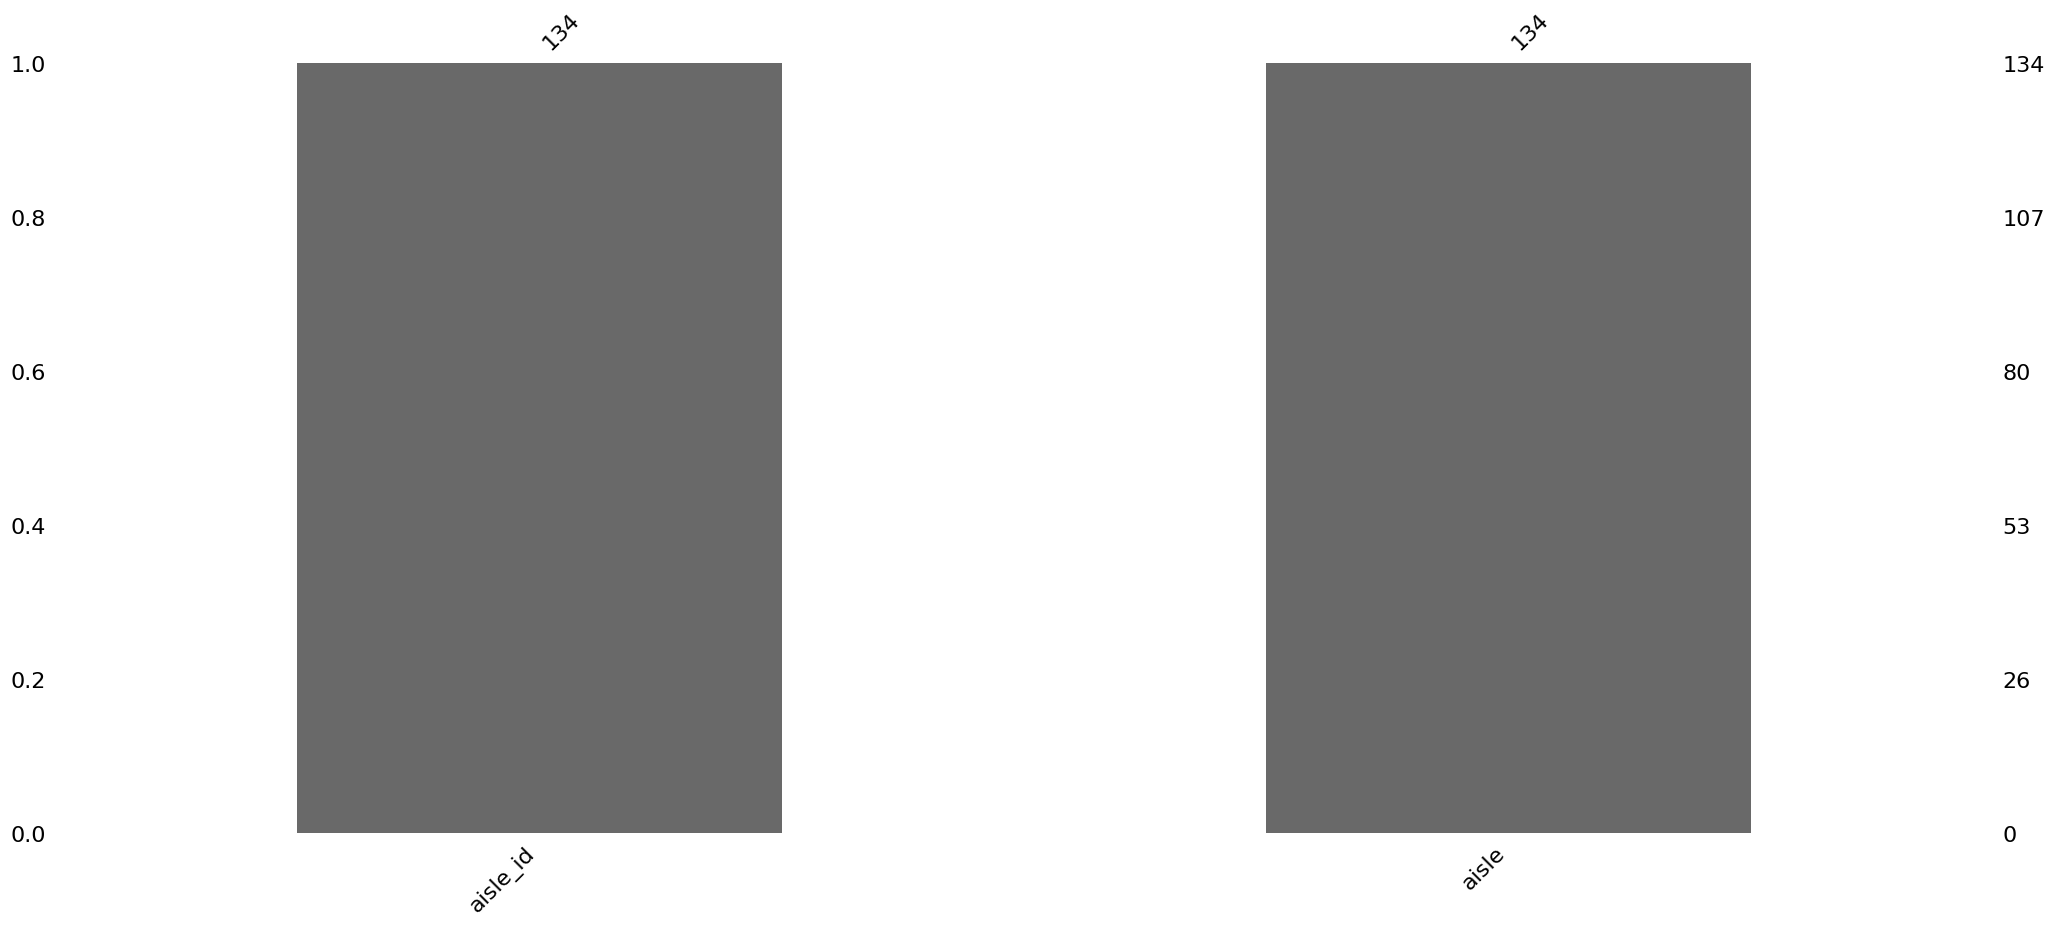

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

----------------------------------------------------------------------------------------------------
Dados de departments


department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

Unique values


department_id    21
department       21
dtype: int64

<Axes: >

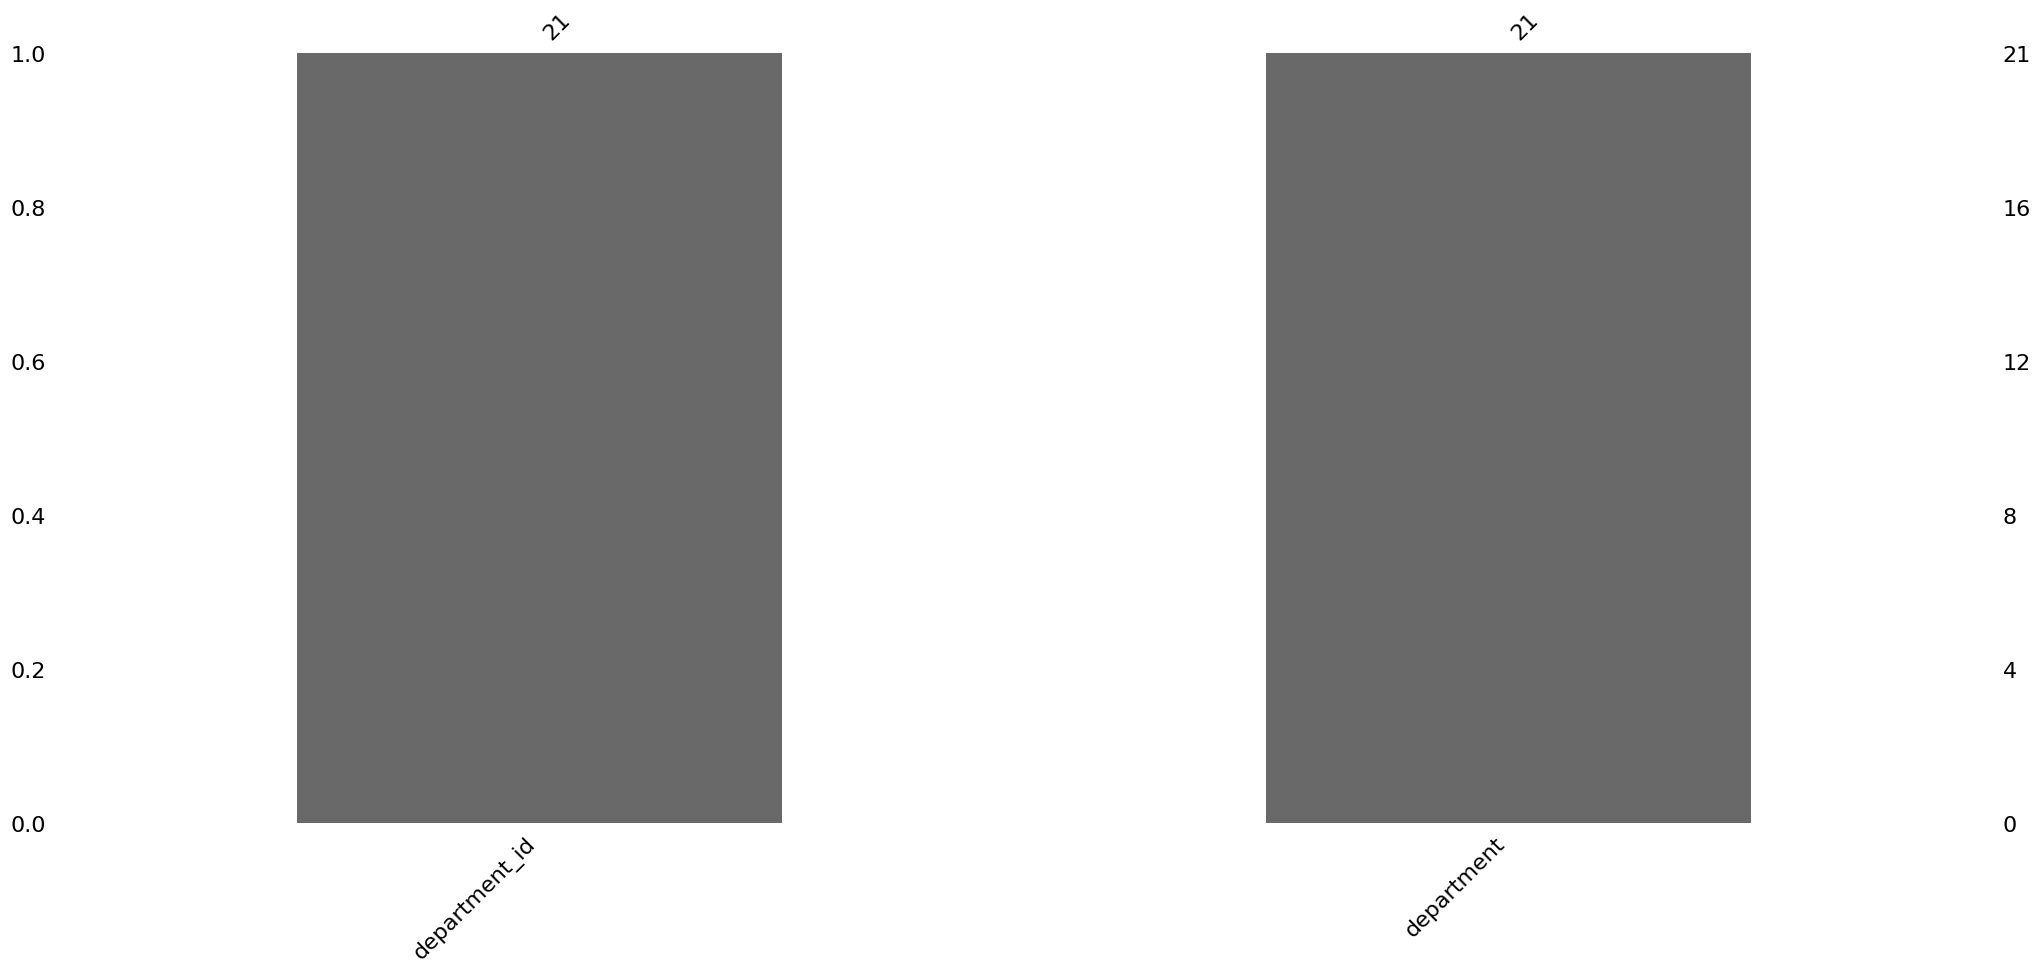

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


None

----------------------------------------------------------------------------------------------------
Dados de order_products


order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

Unique values


order_id             3346083
product_id             49685
add_to_cart_order        145
reordered                  2
dtype: int64

<Axes: >

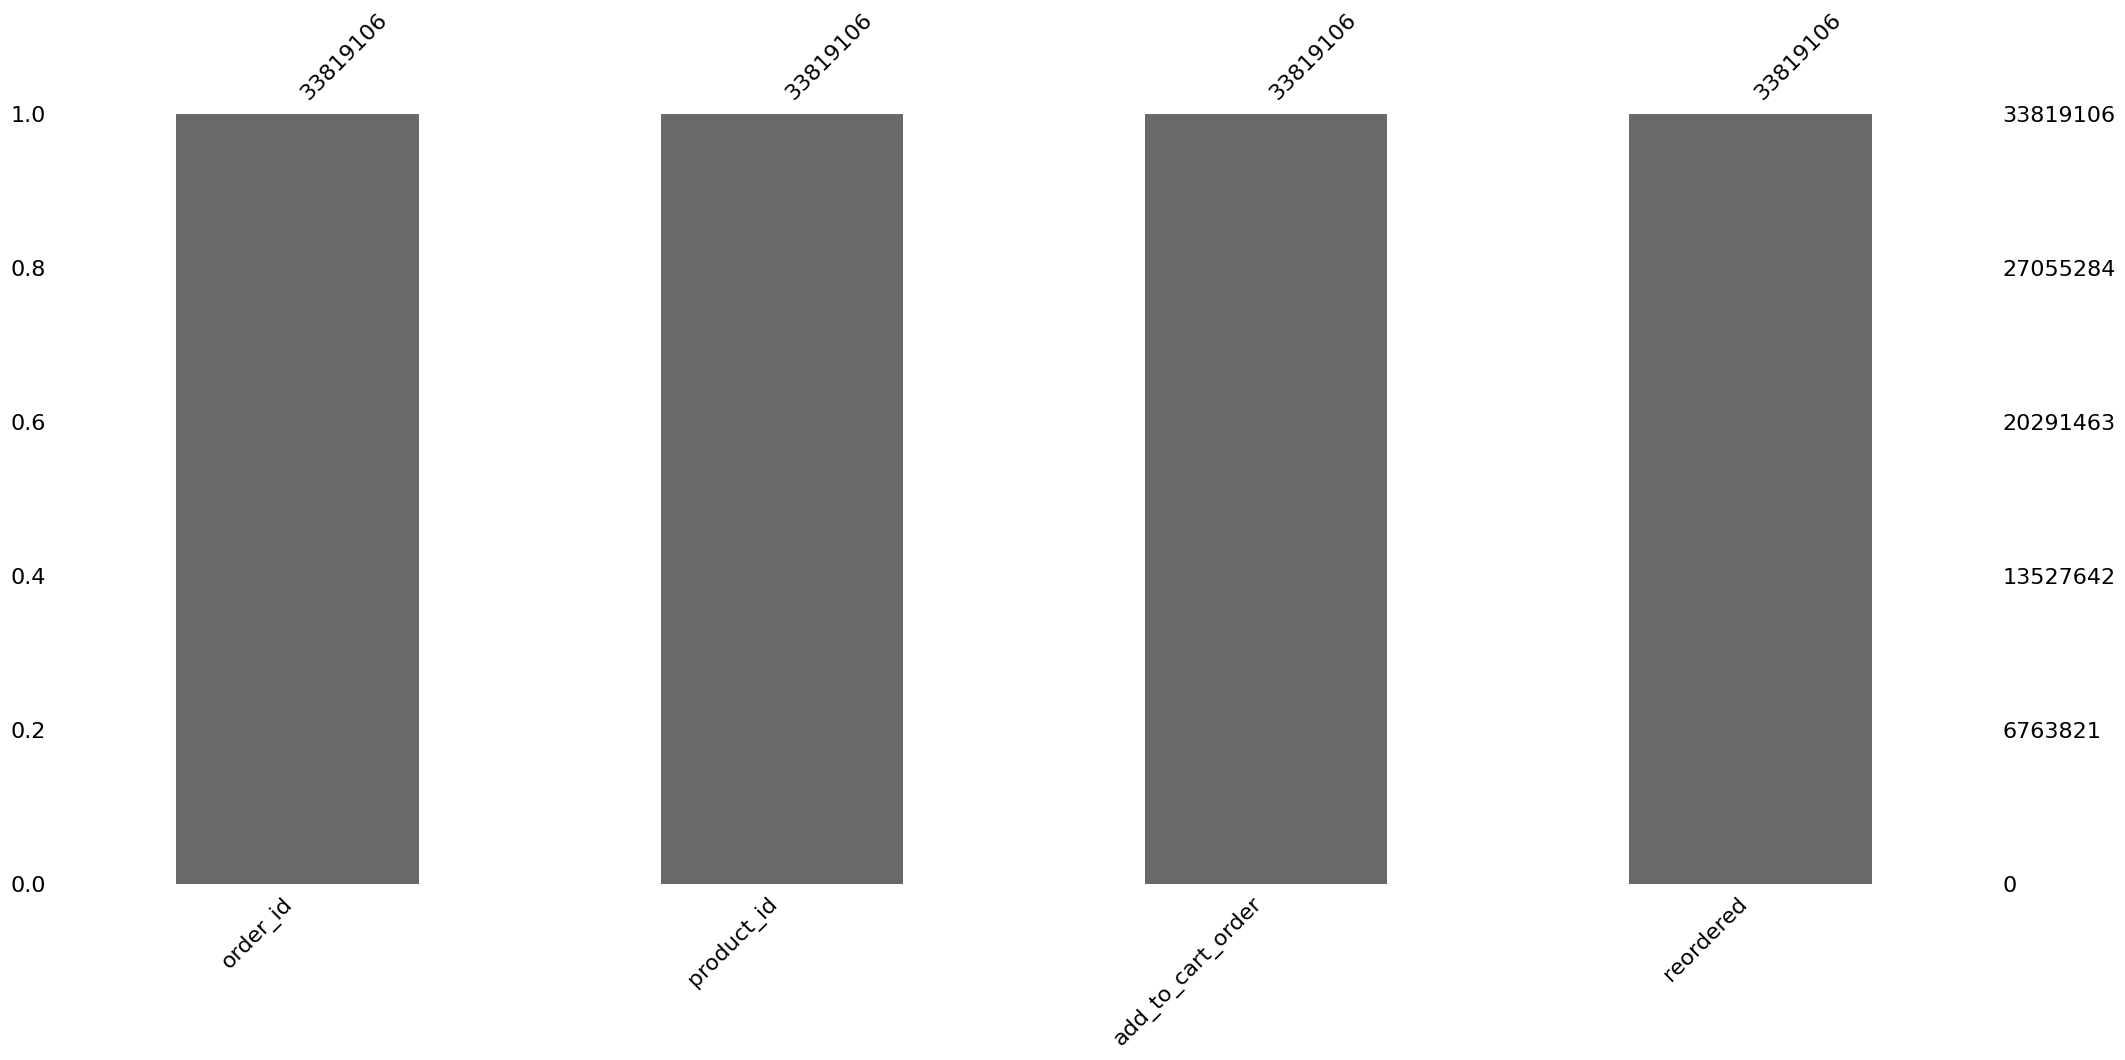

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           33819106 non-null  int64
 1   product_id         33819106 non-null  int64
 2   add_to_cart_order  33819106 non-null  int64
 3   reordered          33819106 non-null  int64
dtypes: int64(4)
memory usage: 1.0 GB


None

----------------------------------------------------------------------------------------------------
Dados de orders


order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
10   1187899        1    train            11          4                  8   
25   1492625        2    train            15          1                 11   
47   2196797        5    train             5          0                 11   
71    525192        7    train            21          2                 11   
75    880375        8    train             4          1                 14   

    days_since_prior_order  
10                    14.0  
25                    30.0  
47                     6.0  
71                     6.0  
75                    10.0

Unique values


order_id                  131209
user_id                   131209
eval_set                       1
order_number                  97
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
dtype: int64

<Axes: >

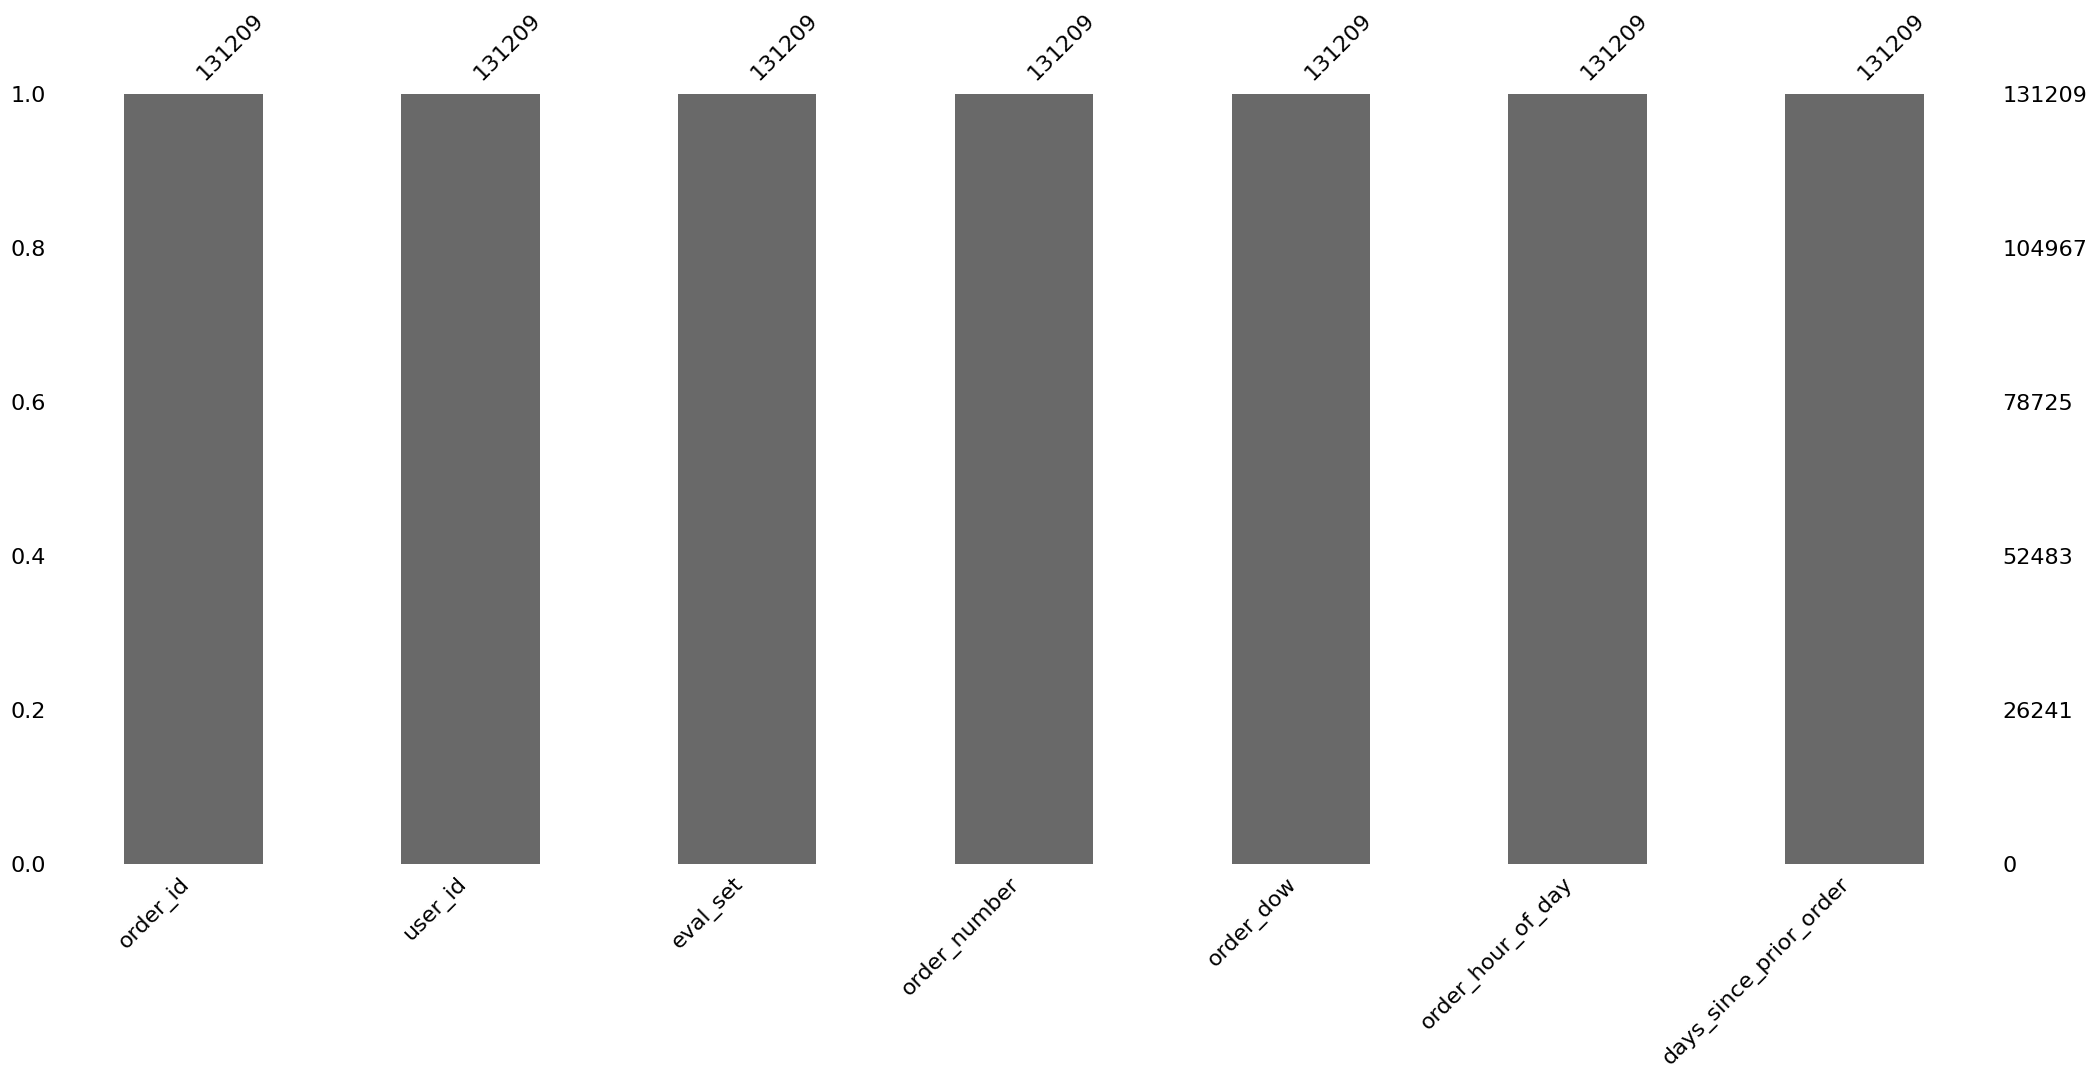

<class 'pandas.core.frame.DataFrame'>
Index: 131209 entries, 10 to 3346082
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                131209 non-null  int64  
 1   user_id                 131209 non-null  int64  
 2   eval_set                131209 non-null  object 
 3   order_number            131209 non-null  int64  
 4   order_dow               131209 non-null  int64  
 5   order_hour_of_day       131209 non-null  int64  
 6   days_since_prior_order  131209 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 8.0+ MB


None

----------------------------------------------------------------------------------------------------
Dados de products


product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

Unique values


product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

<Axes: >

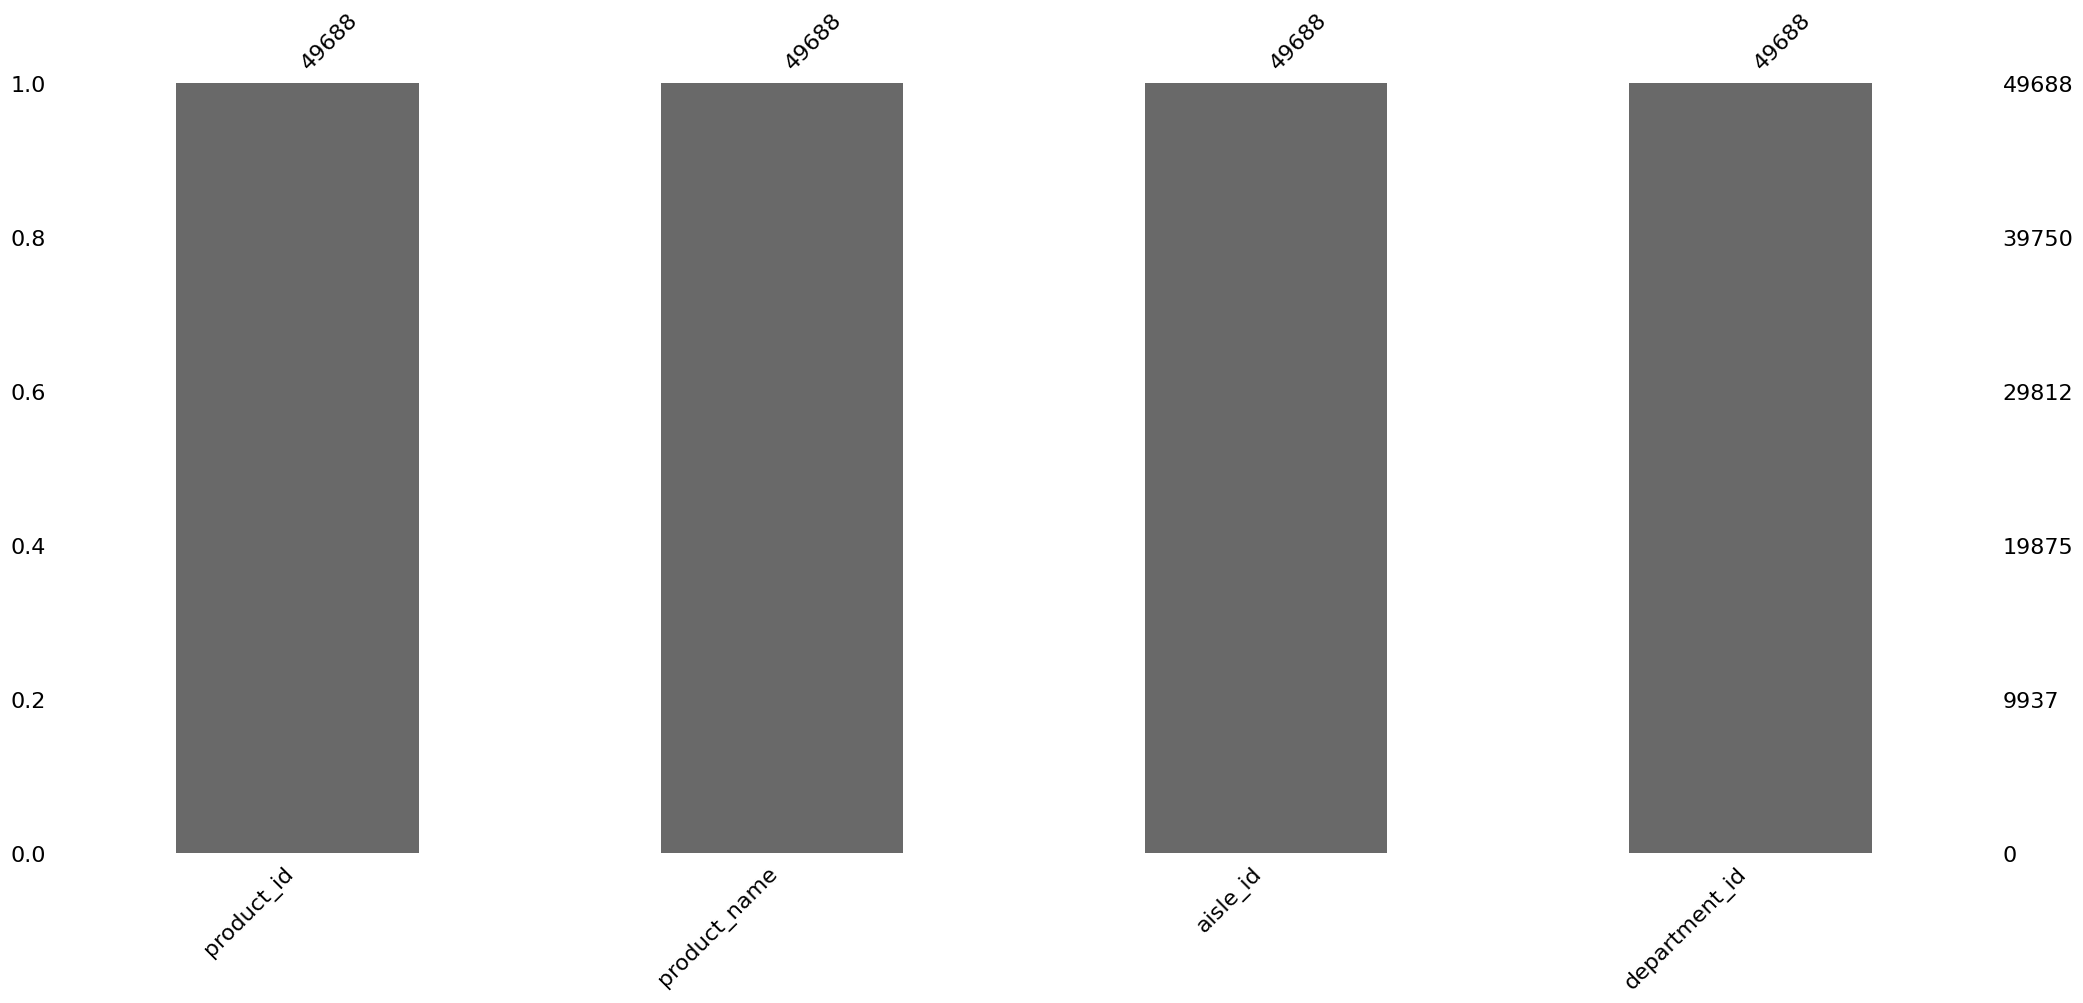

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

----------------------------------------------------------------------------------------------------


In [7]:
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.head(5))
    print("Unique values")
    display(df.nunique())
    display(mn.bar(df))
    plt.show()
    display(df.info(show_counts=True))
    print("-"*100)
    


In [8]:
# orders details

orders_df.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
10   1187899        1    train            11          4                  8   
25   1492625        2    train            15          1                 11   
47   2196797        5    train             5          0                 11   
71    525192        7    train            21          2                 11   
75    880375        8    train             4          1                 14   

    days_since_prior_order  
10                    14.0  
25                    30.0  
47                     6.0  
71                     6.0  
75                    10.0

In [9]:
orders_df.eval_set.value_counts()

eval_set
train    131209
Name: count, dtype: int64

In [10]:
order_products_df.head()

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

In [11]:
products_df.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

### **3.4. Verify outliers**

In [ ]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.info())

#### **3.4.1. Unique values verification**

**order_products dataset**

In [12]:
order_products_df.reordered.value_counts(dropna=False)

reordered
1    19955360
0    13863746
Name: count, dtype: int64

**orders dataset**

In [13]:
orders_df.order_number.value_counts(dropna=False).sort_index()

order_number
4      15300
5      12439
6      10337
7       8853
8       7357
       ...  
96        44
97        30
98        31
99        31
100      867
Name: count, Length: 97, dtype: int64

In [14]:
orders_df.order_dow.value_counts(dropna=False).sort_index()

order_dow
0    27465
1    19672
2    16119
3    15687
4    15959
5    17406
6    18901
Name: count, dtype: int64

In [15]:
orders_df.order_hour_of_day.value_counts(dropna=False).sort_index()

order_hour_of_day
0       852
1       507
2       305
3       223
4       218
5       402
6      1121
7      3376
8      6343
9      9033
10    10585
11    10610
12    10622
13    10711
14    11103
15    11075
16    10495
17     9353
18     7558
19     5721
20     3978
21     3050
22     2442
23     1526
Name: count, dtype: int64

In [16]:
orders_df.days_since_prior_order.value_counts(dropna=False).sort_index()

days_since_prior_order
0.0      2126
1.0      2716
2.0      3496
3.0      4016
4.0      4606
5.0      5025
6.0      6207
7.0      9154
8.0      5371
9.0      3868
10.0     3219
11.0     2927
12.0     3015
13.0     3452
14.0     4516
15.0     2975
16.0     2211
17.0     1875
18.0     1828
19.0     1859
20.0     2142
21.0     2621
22.0     1832
23.0     1474
24.0     1304
25.0     1240
26.0     1218
27.0     1457
28.0     1898
29.0     1442
30.0    40119
Name: count, dtype: int64

**products dataset**

In [17]:
products_df.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [18]:
products_df.aisle_id.unique()

array([ 61, 104,  94,  38,   5,  11,  98, 116, 120, 115,  31, 119,  74,
        56, 103,  35,  79,  63,  40,  20,  49,  47,   3,  41, 127, 121,
        81, 123, 107, 131, 106,  69, 100,  64,  78,  83,  58,  66,  87,
        14, 105,  22, 134,  23, 111, 128,  50,   9,  96,  92,  89,  88,
       130,  26,  77,  65,  12,  95,  19,   7,   6,  97,   2, 112,  10,
        51,  13,  75,  70,  93,  34,  62,  21,  29,  45, 118,   4, 108,
        37, 109,  91,  24,  67, 132,  25, 129,  46,  16,  52,  17,  73,
       122,  42,  59, 126,  33,   1,   8,  82, 114, 124, 117,  72, 110,
        85,  44,  80, 101,  84,  30,  27,  90,  48, 133,  53,  28,  68,
        43, 125,  57,  15,  55,  36,  54, 102,  60,  99,  18,  39,  71,
       113,  86,  32,  76], dtype=int64)

In [19]:
products_df.department_id.unique()


array([19, 13,  7,  1, 11, 16, 17, 18, 12,  9,  8, 14, 15,  4, 21,  6, 20,
        5,  3,  2, 10], dtype=int64)

In [20]:
# Function to detect and visualize outliers based on the IQR
def detect_and_plot_outliers(df, column_name):
    print(f"Outlier removing from {column_name}")
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print statistical details
    print(f"IQR = {IQR}")
    print(f"Lower Bound = {lower_bound}")
    print(f"Upper Bound = {upper_bound}")
    print(f"Min = {df[column_name].min()}")
    print(f"Max = {df[column_name].max()}")
    
    # Plot histogram
    plt.figure(figsize=(10, 3))
    plt.hist(df[column_name], bins=50, color='blue', alpha=0.7)
    plt.axvline(x=lower_bound, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=upper_bound, color='r', linestyle='dashed', linewidth=2)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Create a boolean mask where true indicates the presence of an outlier
    outliers_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    
    # Print percentage of outliers
    print(f"Outliers percentage in the dataset: {round(np.mean(outliers_mask) * 100, 2)}%")
    print("-"*100)
    # Return the dataframe without outliers
    return df[~outliers_mask]


### **Apply the outlier detection to order_products dataframe**

Outlier removing from add_to_cart_order
IQR = 8.0
Lower Bound = -9.0
Upper Bound = 23.0
Min = 1
Max = 145


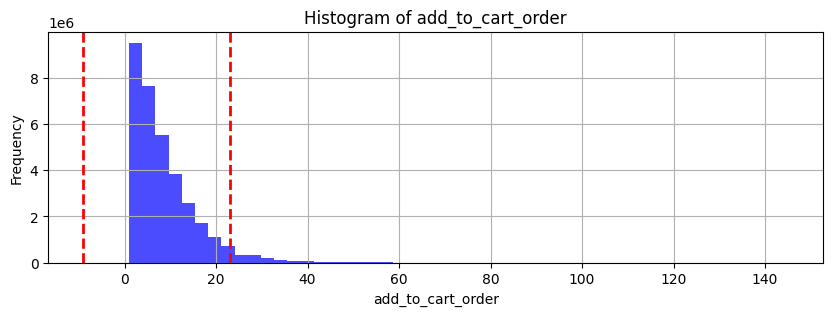

Outliers percentage in the dataset: 4.22%
----------------------------------------------------------------------------------------------------


In [21]:
outliers_removed_order_products_df = detect_and_plot_outliers(order_products_df, 'add_to_cart_order')



### **Apply the outlier detection to orders dataframe**

Outlier removing from days_since_prior_order
IQR = 23.0
Lower Bound = -27.5
Upper Bound = 64.5
Min = 0.0
Max = 30.0


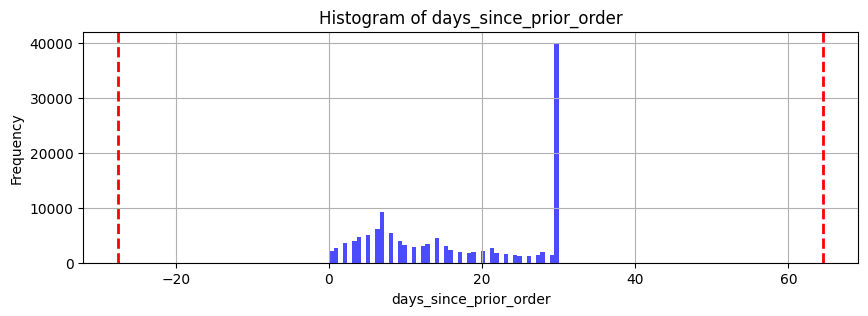

Outliers percentage in the dataset: 0.0%
----------------------------------------------------------------------------------------------------
Outlier removing from order_number
IQR = 14.0
Lower Bound = -15.0
Upper Bound = 41.0
Min = 4
Max = 100


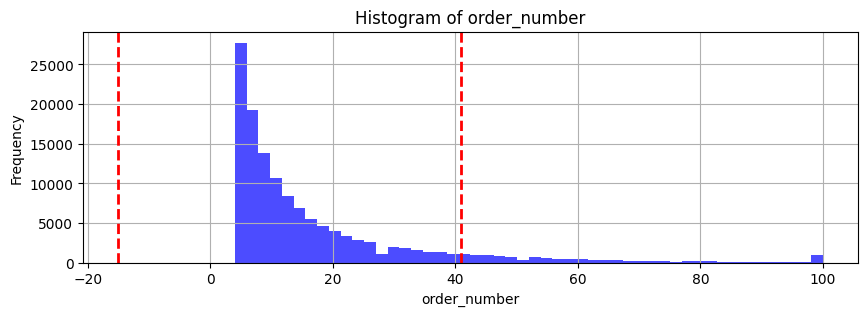

Outliers percentage in the dataset: 8.26%
----------------------------------------------------------------------------------------------------


In [23]:
outliers_removed_orders_df = detect_and_plot_outliers(orders_df, 'days_since_prior_order')
outliers_removed_orders_df = detect_and_plot_outliers(outliers_removed_orders_df, 'order_number')

### **3.5. Data merge**

In [24]:
aisles_df.aisle_id = aisles_df.aisle_id.astype('category')
aisles_df.aisle = aisles_df.aisle.astype('category')

departments_df.department_id = departments_df.department_id.astype('category')
departments_df.department = departments_df.department.astype('category')

products_df.product_id = products_df.product_id.astype('category')
products_df.product_name = products_df.product_name.astype('category')
products_df.aisle_id = products_df.aisle_id.astype('category')
products_df.department_id = products_df.department_id.astype('category')

order_products_df.order_id = order_products_df.order_id.astype('category')
order_products_df.product_id = order_products_df.product_id.astype('category')

orders_df.order_id = orders_df.order_id.astype('category')
orders_df.user_id = orders_df.user_id.astype('category')
orders_df.eval_set = orders_df.eval_set.astype('category')

In [25]:
products_df = pd.merge(products_df, aisles_df, on='aisle_id', how='left')
products_df = pd.merge(products_df, departments_df, on='department_id', how='left')

In [26]:
merged_df = pd.merge(order_products_df, products_df, on='product_id', how='left')

In [27]:
len(orders_df)

131209

In [28]:
orders_df.head()

order_id user_id eval_set  order_number  order_dow  order_hour_of_day  \
10  1187899       1    train            11          4                  8   
25  1492625       2    train            15          1                 11   
47  2196797       5    train             5          0                 11   
71   525192       7    train            21          2                 11   
75   880375       8    train             4          1                 14   

    days_since_prior_order  
10                    14.0  
25                    30.0  
47                     6.0  
71                     6.0  
75                    10.0

In [29]:
final_df = pd.merge(merged_df, orders_df, on='order_id', how='inner')

In [30]:
len(final_df)

1384617

# **4. Exploratory Data Analysis (EDA)**

### **4.1. Order Quantity Analysis**

**Key Questions:**
1. **How many orders include multiple products?**
2. **How many orders have five or more products?**
3. **How many orders include ten or more products?**

In [257]:

order_id_agg = final_df.groupby("order_id").agg(count = ("order_id", "count"))
top_orders = order_id_agg.sort_values(by = ["count"], ascending = False)
top_orders.rename(columns = {"count": "products"}, inplace = True)

gt_one = len(top_orders[top_orders["products"] > 1])
ge_five = len(top_orders[top_orders["products"] >= 5])
ge_ten = len(top_orders[top_orders["products"] >= 10])
print(f"""Ordering more than one product: {gt_one} or {round(gt_one/len(top_orders)*100, 1)}% of total orders
Orders of 5 or more products: {ge_five} or {round(ge_five/len(top_orders)*100, 1)}% of total orders
Orders of 10 or more products: {ge_ten} or {round(ge_ten/len(top_orders)*100, 1)}% of total orders
""")

Ordering more than one product: 124364 or 94.8% of total orders
Orders of 5 or more products: 100745 or 76.8% of total orders
Orders of 10 or more products: 59401 or 45.3% of total orders





**Interpretation of Results:**

- **Orders with multiple products:** 124,364 (94.8% of total orders). This indicates that most customers buy several items per visit, suggesting preference for comprehensive shopping.
  
- **Orders with 5+ products:** 100,745 (76.8%). This large portion of orders suggests regular stock-up behavior, likely driven by routine shopping needs.

- **Orders with 10+ products:** 59,401 (45.3%). A significant fraction of customers engage in bulk purchases, indicating shopping for households or events.

**Strategic Implications:**

- **Marketing:** Focus on promotions that encourage buying in bulk, such as discounts for larger baskets.
  
- **Inventory:** Ensure availability of high-demand items to satisfy bulk purchase habits.

- **Store Layout:** Optimize store layout to support easy access to frequently bought items, enhancing the shopping experience for bulk buyers.


### **4.2. Order Volume By Departments**

         department  sales [k]  percent
0           produce      409.1     29.5
1        dairy eggs      217.1     15.7
2            snacks      118.9      8.6
3         beverages      114.0      8.2
4            frozen      100.4      7.3
5            pantry       81.2      5.9
6            bakery       48.4      3.5
7      canned goods       46.8      3.4
8              deli       44.3      3.2
9   dry goods pasta       38.7      2.8
10        household       36.0      2.6
11     meat seafood       30.3      2.2
12        breakfast       29.5      2.1
13    personal care       21.6      1.6
14           babies       14.9      1.1
15    international       11.9      0.9
16          missing        8.3      0.6
17          alcohol        5.6      0.4
18             pets        4.5      0.3
19            other        1.8      0.1
20             bulk        1.4      0.1
Total order: 1.4 M


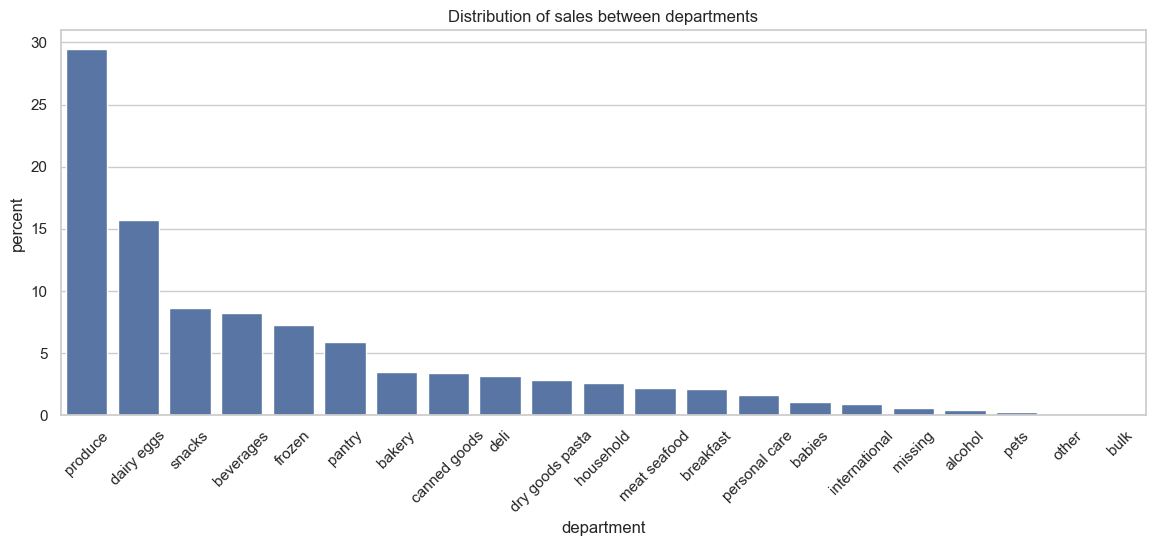

In [258]:
def plot_order_volume_by_department():

    df1 = final_df.department.value_counts(ascending = False).to_frame()

    df1["percent"] = round(df1["count"]/df1["count"].sum()*100, 1)
    df1["count"] = round(df1["count"]/1000, 1)
    df1 = df1.rename(columns={"count": "sales [k]"})
    df1.reset_index(inplace= True)
    print(df1)
    print(f"Total order: {round(len(final_df)/1000_000, 1)} M")
    plt.figure(figsize=(14, 5))
    sns.barplot(data = df1, x = "department", y = "percent", order=df1['department'])
    plt.title("Distribution of sales between departments")
    plt.xticks(rotation = 45);
plot_order_volume_by_department()

### **Insights**

Several key insights into the distribution of sales across different departments in a retail dataset:

**Order Concentration**
- The **`produce`** department leads with a significant 29.5% share of total sales, amounting to 409.1k sales, indicating a strong consumer preference for fresh and perishable goods.
  
- **`dairy eggs`** is the second most popular department, accounting for 15.7% of sales, reflecting regular purchases of essential food items.

**Order Distribution**
- There is a sharp drop in order percentages after the top-selling departments, with departments like **`snacks`** and **`beverages`** representing only 8.6% and 8.2%, respectively.

**Lower Volume Departments**
- Departments like **`alcohol`**, **`pets`**, **`other`**, and **`bulk`** contribute less than 1% each to total sales, likely reflecting niche markets with fewer regular buyers.

### **Which Products Lead Sales in Each Department?**

In [42]:
# Converting data types enhances the efficiency of graph plotting by ensuring faster processing and accurate data representation.

final_df.aisle_id = final_df.aisle_id.astype('Int64')
final_df.aisle = final_df.aisle.astype('object')

final_df.department_id = final_df.department_id.astype('Int64')
final_df.department = final_df.department.astype('object')

final_df.product_id = final_df.product_id.astype('Int64')
final_df.product_name = final_df.product_name.astype('object')
final_df.aisle_id = final_df.aisle_id.astype('Int64')
final_df.department_id = final_df.department_id.astype('Int64')

final_df.order_id = final_df.order_id.astype('Int64')
final_df.product_id = final_df.product_id.astype('Int64')

final_df.order_id = final_df.order_id.astype('Int64')
final_df.user_id = final_df.user_id.astype('Int64')
final_df.eval_set = final_df.eval_set.astype('object')

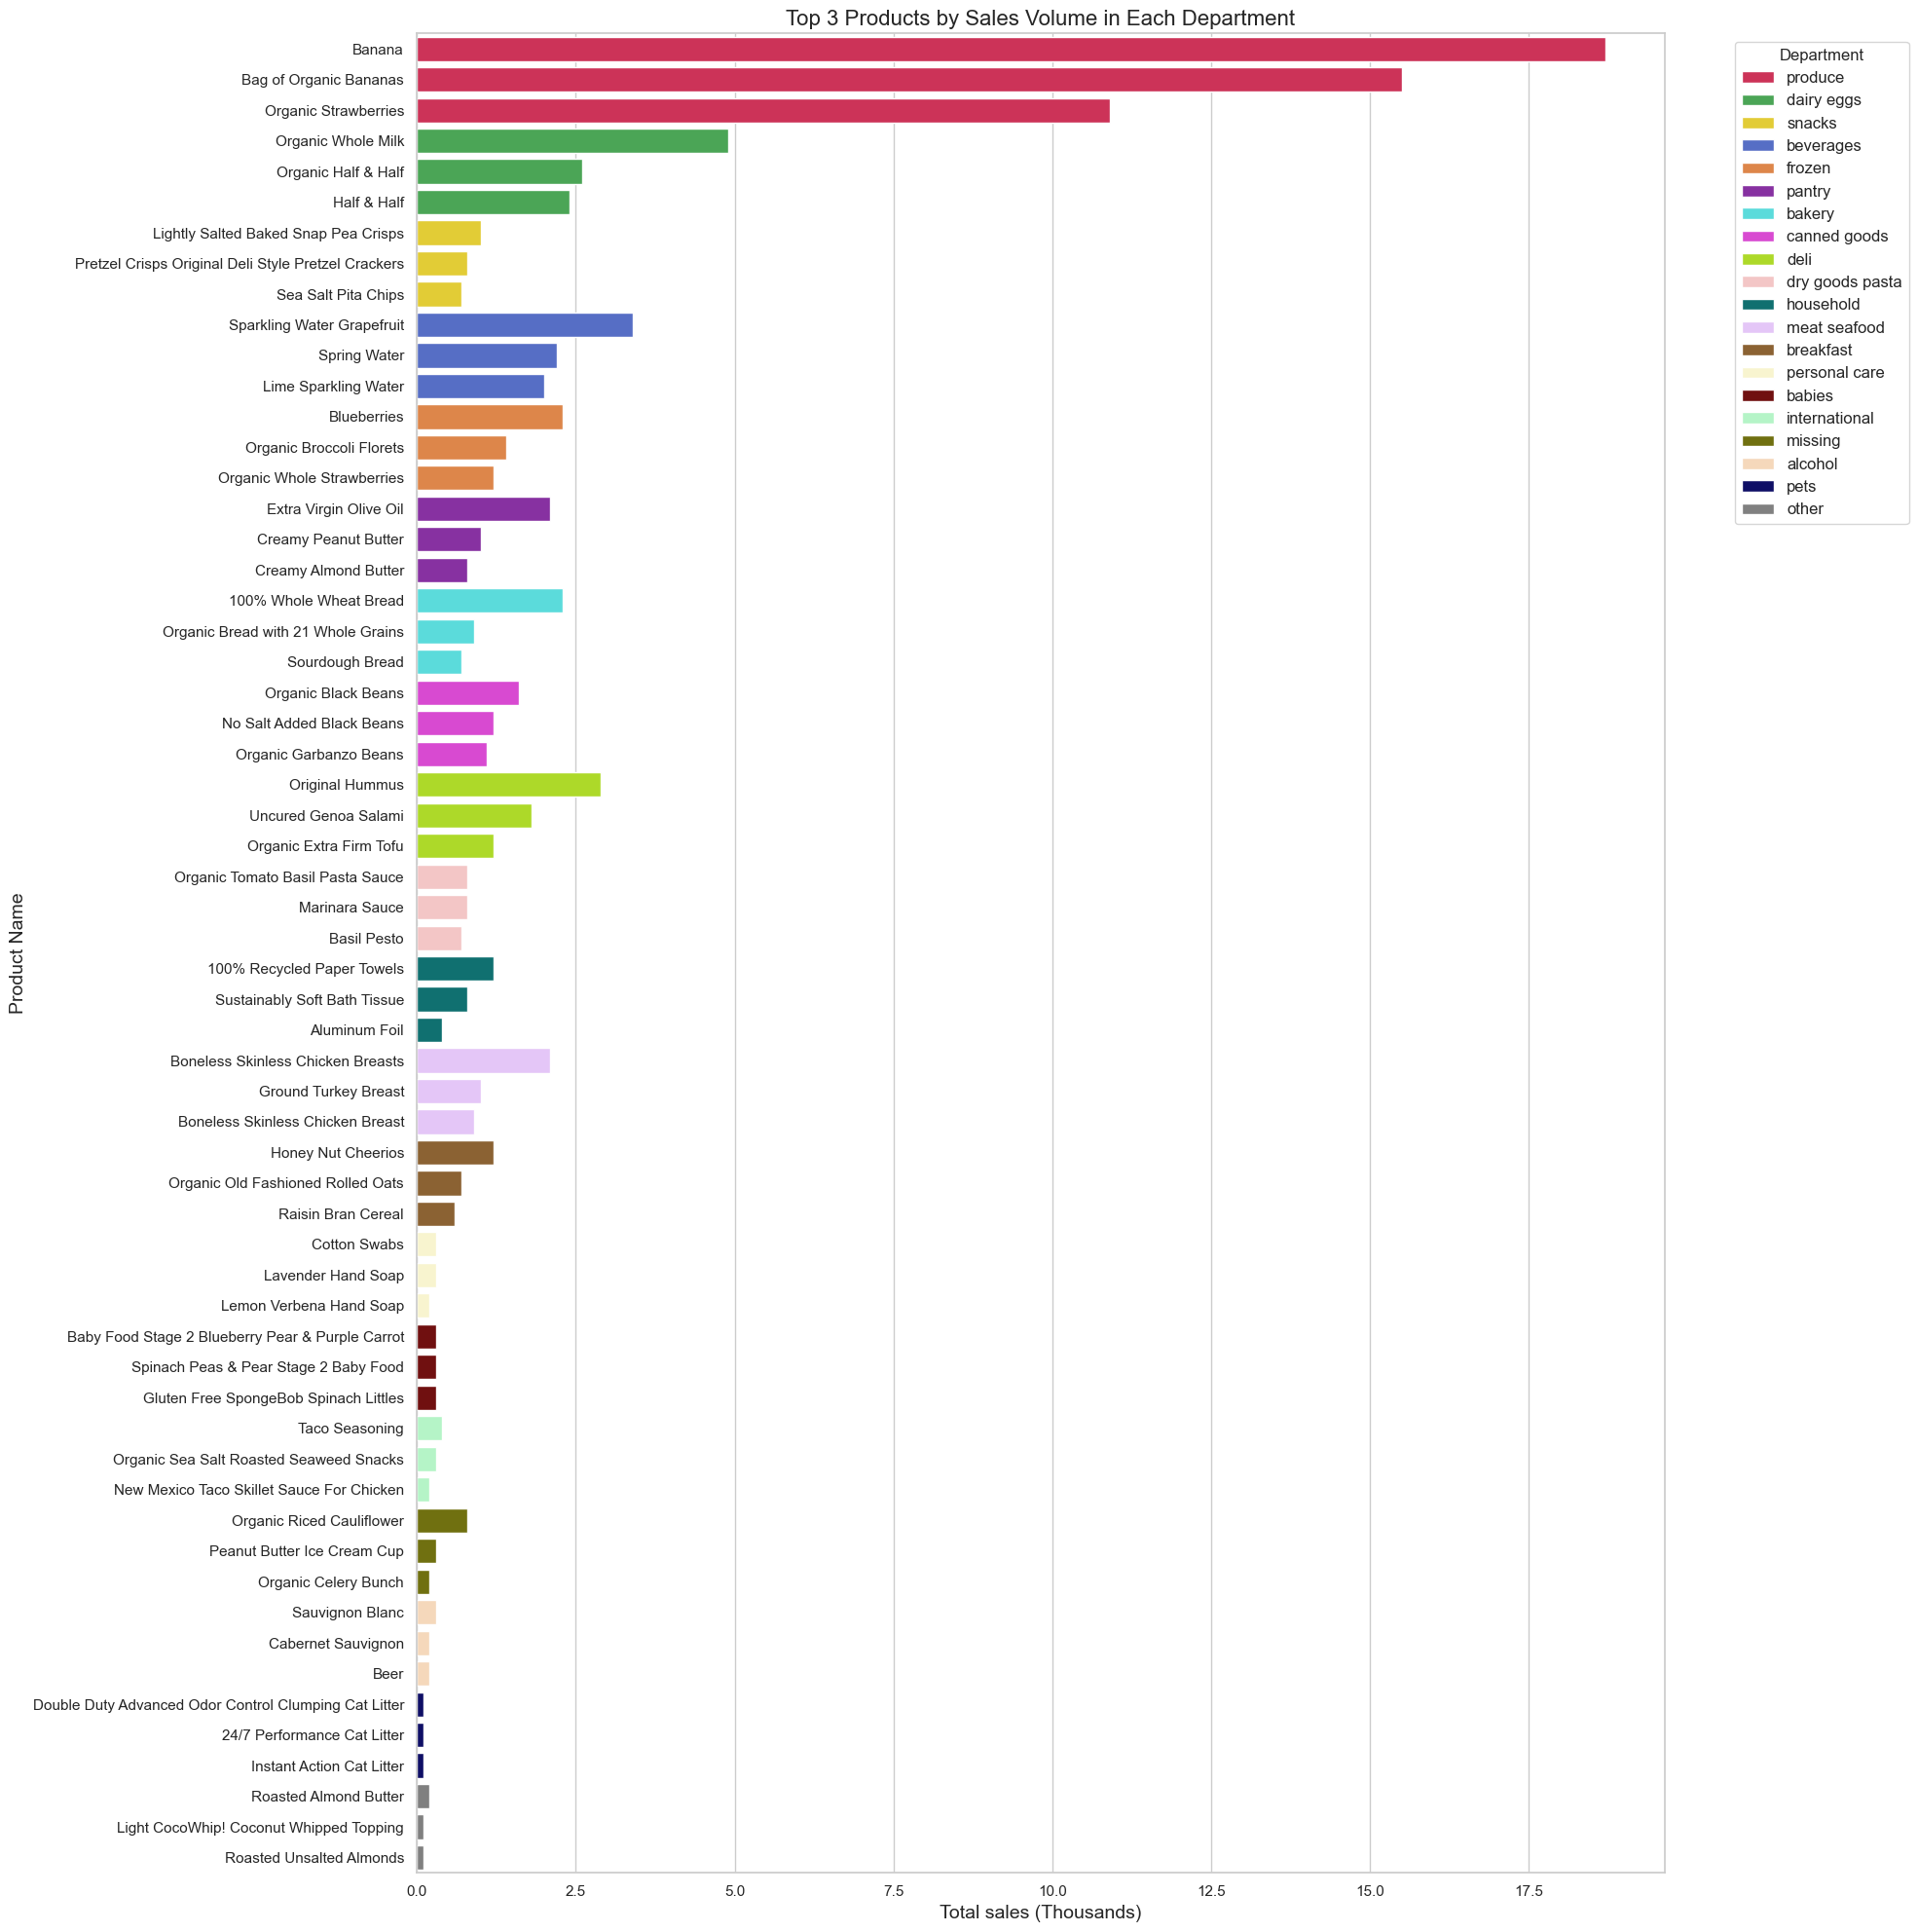

In [259]:
def top_n_product_by_order_volume_in_each_department(top_n_products = 3, n_top_departments = -1):
    """
    Generates a bar plot visualizing the top N products by sales volume within each department.

    This function aggregates order data to identify the top-selling products in each department based on the total number of sales. It then visualizes this information in a bar chart, allowing for easy comparison across departments and products. The function can be customized to display a specific number of top products and departments.

    Parameters:
    - top_n_products (int): The number of top products to display per department.
    - n_top_departments (int): The number of top departments to include in the visualization. Use -1 to include all departments.

    Returns:
    - None: Displays a matplotlib bar plot of the top N products by order volume in each department.

    Example:
    >>> top_n_product_by_order_volume_in_each_department(top_n_products=3, n_top_departments=5)
    This will display a bar plot for the top 5 departments, each showing their top n products based on order volume.
    """
    aggregated_data = final_df.groupby(['department', 'product_name']).size().reset_index(name='sales').sort_values(by=['department', 'product_name'])

    # Initializing the list to store DataFrames of the top n products per department
    top_products_list = []
    
    df = final_df.department.value_counts(ascending = False).to_frame()
    df.reset_index(inplace= True)
    
    # Iterating over unique departments
    for department in df.department.unique()[:n_top_departments]:
        # Filtering data for the current department
        dept_data = aggregated_data[aggregated_data.department == department].copy()
        
        # Converting sales to thousands ('k') using .loc[]
        dept_data.loc[:, 'sales [k]'] = round(dept_data['sales'] / 1000, 1)
        
        # Selecting the top n products based on order volume
        top_products = dept_data.nlargest(top_n_products, 'sales')
        top_products.loc[:, 'department'] = department  # Ensuring department column is updated for clarity
        top_products_list.append(top_products)


    # Consolidating the top n products from all departments
    all_top_products = pd.concat(top_products_list)

    # Setting a custom color palette
    custom_palette = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#bbffff", "#e61941"]
    sns.set_palette(custom_palette)


    # Visualization focusing on sales volume
    plt.figure(figsize=(20, 20))
    barplot = sns.barplot(data=all_top_products, x="sales [k]", y="product_name", hue="department", dodge=False)

    # Enhancing readability
    plt.title(f"Top {top_n_products} Products by Sales Volume in Each Department", fontsize=16)
    plt.xlabel("Total sales [k]", fontsize=14)
    plt.ylabel("Product Name", fontsize=14)
    plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()
    

top_n_product_by_order_volume_in_each_department(top_n_products = 3, n_top_departments = -1)


### How This Graph Helps

Data: Train Data

The train dataset was analyzed. For this analysis, daily or weekly breakdowns were not performed to allow for a comprehensive comparison of order volumes across the entire data collection period.

This chart provides a detailed look at the top-selling products within selected departments, offering valuable insights into consumer preferences and buying behaviors. By examining specific examples from the data, we can better understand the significance of this visualization:

- **High Volume Sellers in Produce:** The chart highlights 'Banana' with 18.7 thousand sales and 'Bag of Organic Bananas' with 15.5 thousand sales as the top sellers in the produce department. These products significantly outperform others, like 'Organic Strawberries,' which have 10.9 thousand sales. This dominance suggests bananas are a staple in customer shopping lists, indicating consistent demand that requires robust stock management.

- **Dairy and Egg Essentials:** In the dairy and eggs department, 'Organic Whole Milk' leads with 4.9 thousand sales, more than double the sales for 'Organic Half & Half' at 2.6 thousand. This disparity highlights the importance of milk as an essential dairy product, which could influence promotional strategies and shelf placement to maximize visibility and accessibility.

- **Popular Snacks:** In the snacks department, products like 'Lightly Salted Baked Snap Pea Crisps' and 'Pretzel Crisps Original Deli Style Pretzel Crackers' show a considerable variance in sales, with 991 and 753 sales respectively. Understanding the popularity of healthier or unique snack options can guide inventory decisions and marketing campaigns targeting health-conscious consumers.

- **Beverage Preferences:** The beverages department shows a strong preference for 'Sparkling Water Grapefruit' with 3.4 thousand sales, indicating a trend towards flavored water over traditional options like 'Spring Water' with 2.2 thousand sales. This trend could be leveraged in product development and marketing to cater to preferences for flavored, healthier drink choices.

- **Frozen Goods:** The frozen section's top products like 'Blueberries' at 2.3 thousand sales indicate a preference for convenient, healthy frozen fruits. This data can help adjust stock levels and marketing focus towards promoting healthy, easy-to-prepare meal components.

**Strategic Implications:**
- **Inventory Management:** These insights assist in fine-tuning inventory levels to ensure high-demand products are adequately stocked, especially during peak shopping times.
- **Marketing Focus:** Promotional activities can be targeted towards these top sellers to drive foot traffic and increase basket size.
- **Product Placement:** Strategic placement of these high-volume products can enhance visibility and accessibility, improving customer satisfaction and sales.

In summary, this visualization not only identifies the leading products in each department but also provides a quantitative basis for strategic decisions that align with consumer preferences, enhancing operational efficiency and market responsiveness.

### **4.4. Departmental Share of Top Selling Products**

Top Best-Selling Products in Each Department by Percentage within Department

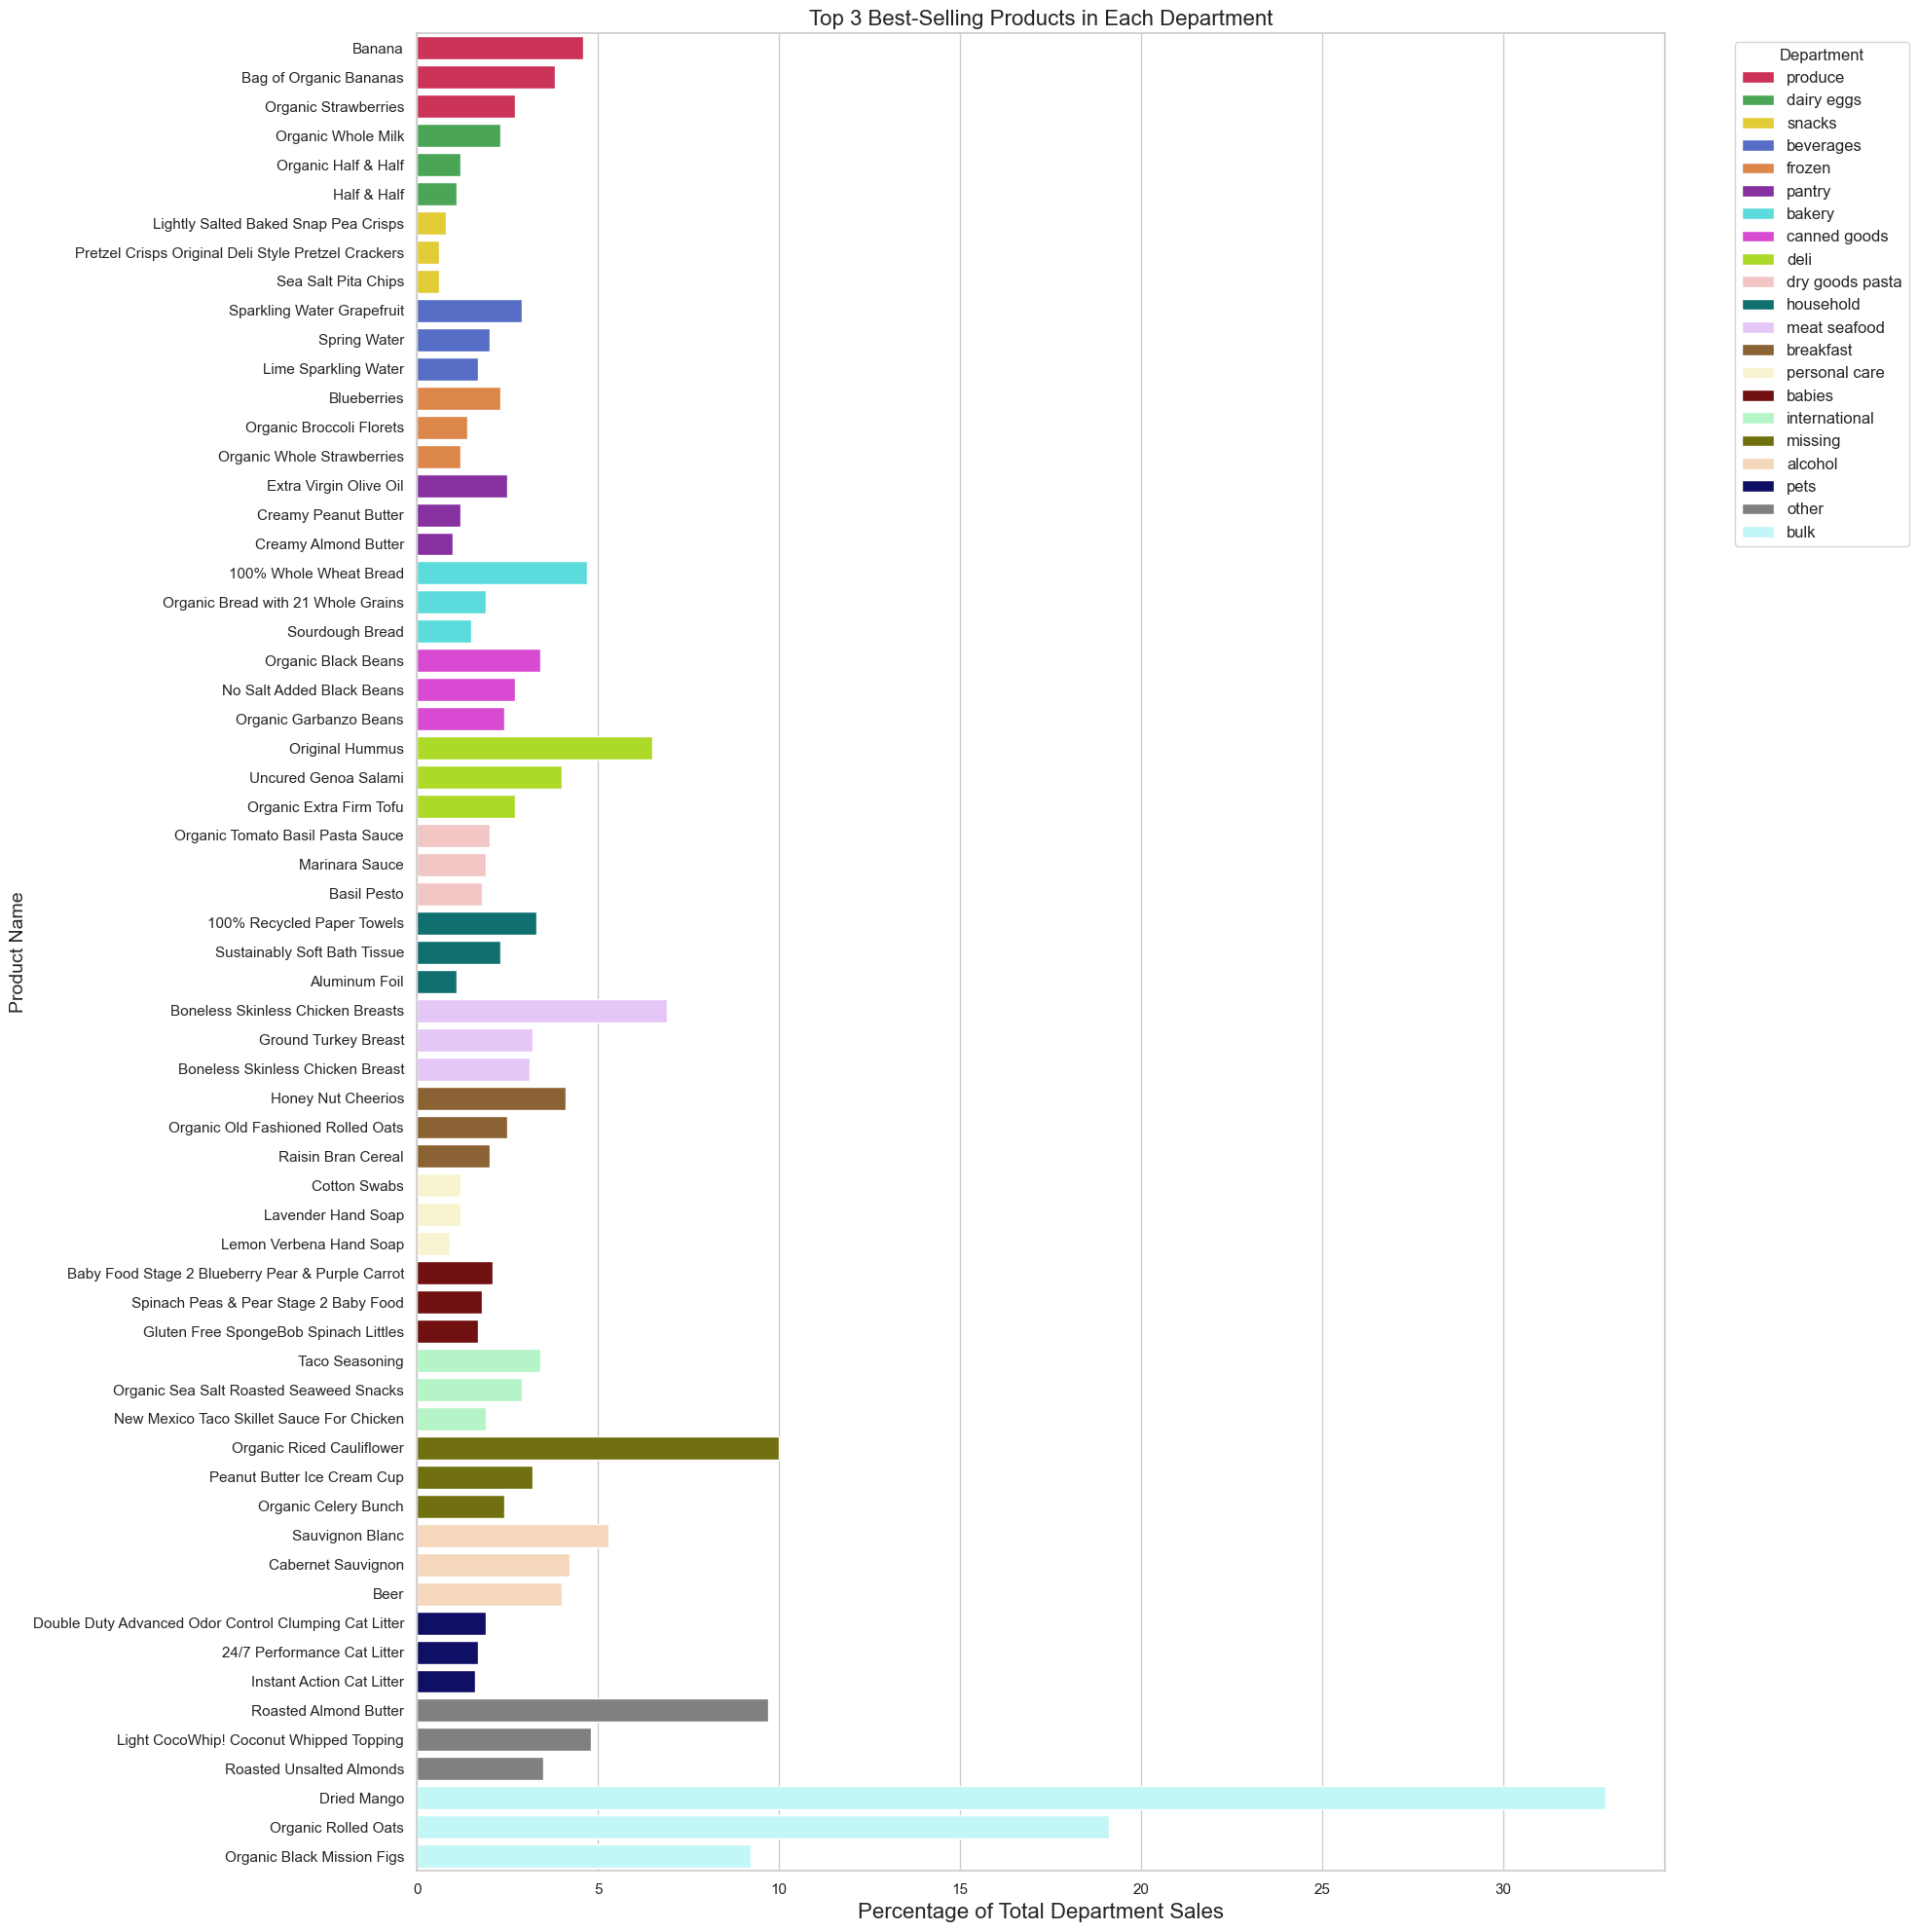

In [260]:

def plot_top_products_by_department_sales(top_n_products = 3):

    # Data Aggregation
    aggregated_data = final_df.groupby(['department', 'product_name']).size().reset_index(name='sales')

    # Calculation of Total sales by Department
    total_sales_by_department = aggregated_data.groupby('department')['sales'].sum().rename('total_sales')

    # Initialization of a List to Store the DataFrames of the Top n Products
    top_products_list = []

    df = final_df.department.value_counts(ascending = False).to_frame()
    df.reset_index(inplace= True)
    
    # Iteration Over Unique Departments
    for department in df.department.unique():
        # Filtering Data for the Current Department
        dept_data = aggregated_data[aggregated_data.department == department].copy()
        
        # Calculation of Sales Percentage and Conversion of sales to Thousands ('k')
        total_sales = total_sales_by_department.loc[department]
        dept_data.loc[:, 'percentage'] = round(dept_data['sales'] / total_sales * 100, 1)  # Sales percentage of each product
        dept_data.loc[:, 'sales [k]'] = round(dept_data['sales'] / 1000, 1)  # Sales volume in thousands
        
        # Selection of the Top 3 Products by Order Volume
        top_products = dept_data.nlargest(top_n_products, 'sales')
        top_products.loc[:, 'department'] = department
        top_products_list.append(top_products)

    # Consolidation of the Top 3 Products from All Departments
    all_top_products = pd.concat(top_products_list)

    # Definition of a Custom Color Palette with Distinct Colors
    custom_palette = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#bbffff", "#e61941"]
    sns.set_palette(custom_palette)

    # Visualization
    plt.figure(figsize=(20, 20))
    barplot = sns.barplot(data=all_top_products, x="percentage", y="product_name", hue="department", dodge=False)

    # Improving Legibility
    plt.title(f"Top {top_n_products} Best-Selling Products in Each Department", fontsize=16)
    plt.xlabel("Percentage of Total Department Sales", fontsize=16)
    plt.ylabel("Product Name", fontsize=14)
    plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # pd.set_option('display.max_rows', None)
    # pd.set_option('display.max_columns', None)
    # pd.set_option('display.width', None)
    # pd.set_option('display.max_colwidth', None)
    # all_top_products = pd.concat(top_products_list)
    # print(all_top_products)
plot_top_products_by_department_sales()


### How This Graph Helps


1. **Identifying Core Products in Key Departments**:
   - **Bulk Department**: 'Dried Mango' dominates its category with a substantial 32.8% of the bulk department's sales, signifying its critical role in the department's performance.
   - **Missing Department**: 'Organic Riced Cauliflower' stands out, representing 10.0% of the missing category's sales, highlighting its significant unexpected demand.

2. **Guiding Strategic Decisions for Promotions and Inventory**:
   - **Other Department**: 'Roasted Almond Butter' holds an impressive 9.7% share in its department, indicating a strong niche market that could benefit from targeted marketing strategies.
   - **Deli Department**: 'Original Hummus' leads with 6.5% of deli sales, suggesting a potential focus area for promotional activities to capitalize on its popularity.

3. **Optimizing Resource Allocation Based on Product Significance**:
   - **Meat Seafood Department**: 'Boneless Skinless Chicken Breasts' make up 6.9% of sales, emphasizing their importance in inventory planning and marketing efforts to maximize revenue from this key product.
   - **Bakery Department**: '100% Whole Wheat Bread' has a notable 4.7% share, supporting strategic placement and promotion to enhance sales in the bakery section.

### Conclusion

By focusing on products with the highest percentages within their departments, this graph reveals crucial insights into market dynamics and product significance. These details not only guide more effective marketing and inventory strategies but also help in understanding consumer preferences, ensuring that business operations are aligned with market demand. This approach maximizes resource utilization and enhances the departmental performance, ultimately boosting overall business outcomes.

# **Seasonality**

### **On which days does each department sell the most?**

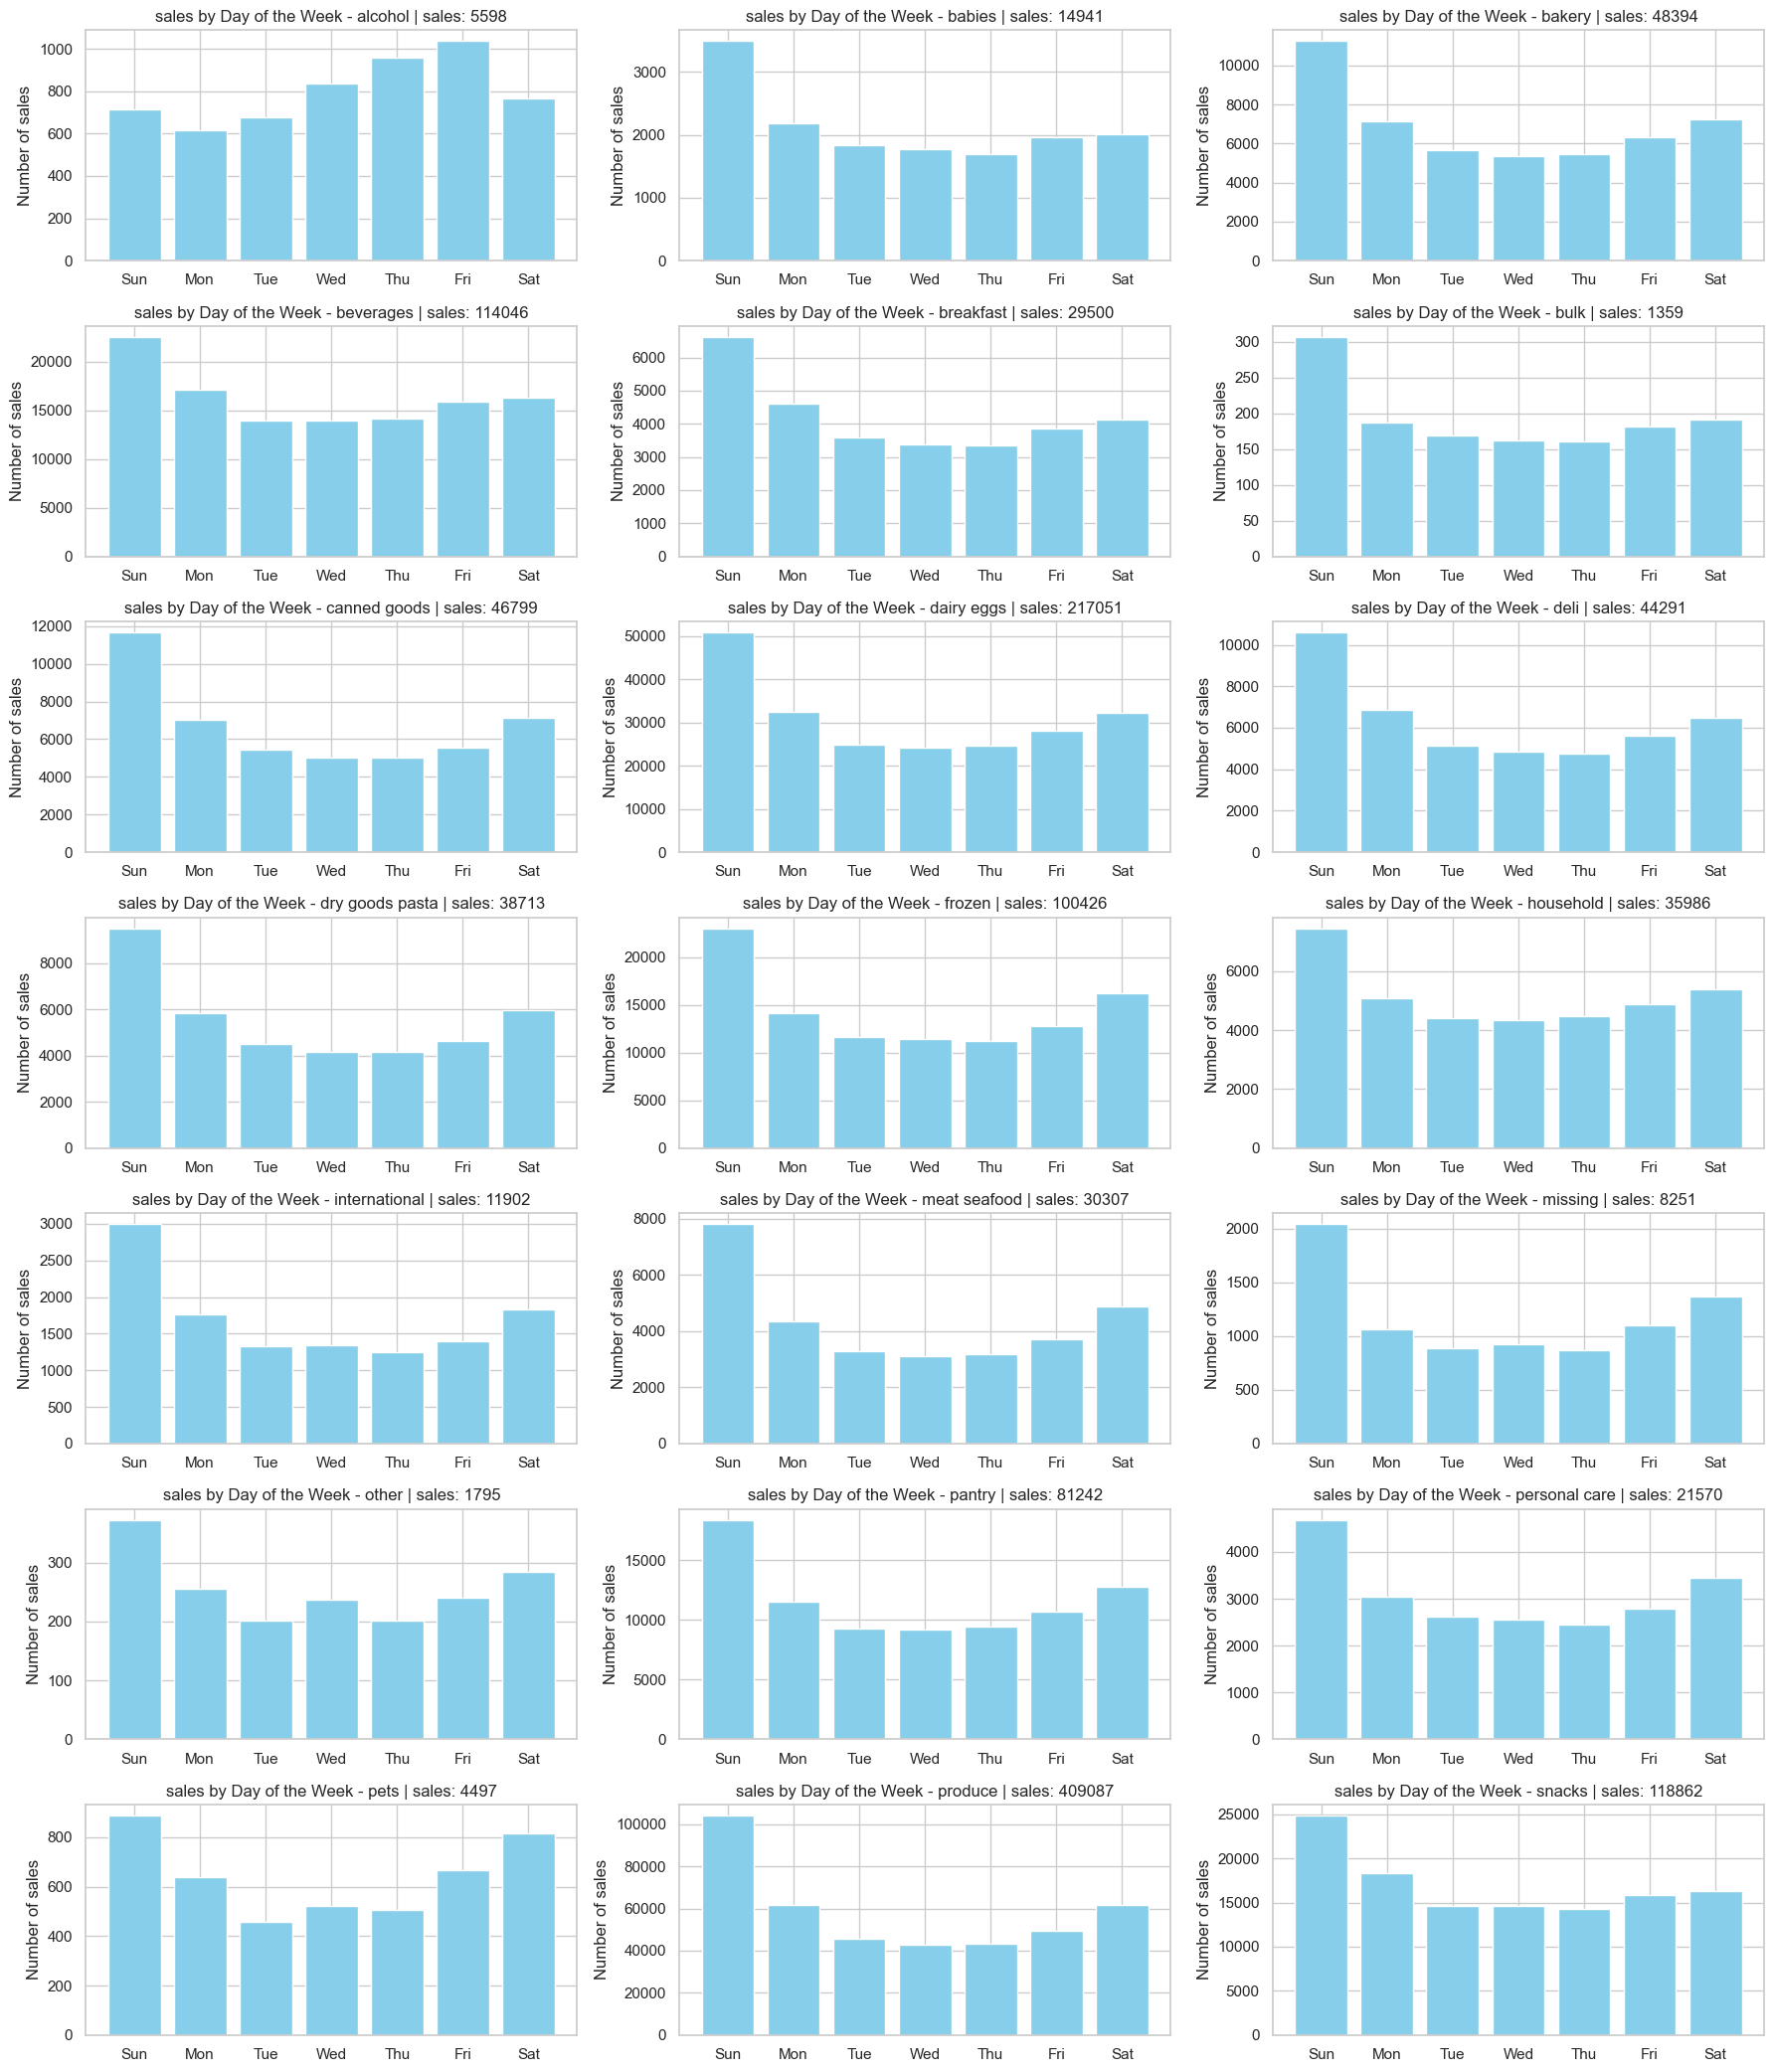

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sales_by_department_and_day(final_df):
    """
    This function plots the total sales by department and day of the week in a multi-panel layout,
    fitting three plots per row.

    Parameters:
        final_df (DataFrame): A pandas DataFrame containing at least the columns 'department', 'order_dow',
        and a way to count sales (e.g., 'product_id' or 'order_id').

    The function groups the data by department and day of the week, counts the number of sales, and then
    plots this data for each department in a subplot with 3 plots per row.
    """
    
    # Grouping data by department and day of the week, calculating total sales
    sales_by_department_day = final_df.groupby(['department', 'order_dow']).size().reset_index(name='sales')
    
    # Getting a unique list of all departments
    departments = sales_by_department_day['department'].unique()

    # Determine the number of rows needed for subplots
    num_rows = (len(departments) + 2) // 3  # adjust the denominator to change number of columns per row
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 3 * num_rows))  # adjust figsize accordingly
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # Loop through each department to create a bar chart of sales by day of the week
    for i, department in enumerate(departments):
        dept_sales = sales_by_department_day[sales_by_department_day['department'] == department]
        
        # Creating the bar chart on subplot
        axes[i].bar(dept_sales['order_dow'], dept_sales['sales'], color='skyblue')
        axes[i].set_title(f'sales by Day of the Week - {department} | sales: {dept_sales.sales.sum()}')
        axes[i].set_ylabel('Number of sales')
        axes[i].set_xticks(range(0, 7))
        axes[i].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

    # Hide unused subplots if there are any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Displaying the chart
    plt.tight_layout()
    plt.show()

plot_sales_by_department_and_day(final_df)


The analysis of the provided data reveals interesting patterns about how sales vary by department throughout the week. Let's explore some specific observations and insights that can be drawn from the plotted data:

### Observations from the Data

1. **Weekend Peaks**: Many departments show a noticeable increase in sales on weekends, particularly on Saturdays. For instance, the `produce` department sees a significant jump in sales from Friday to Saturday. This pattern suggests that shopping activity increases as customers prepare for the weekend.

2. **Midweek Trends**: Several departments experience a midweek dip in sales. For example, departments like `dairy eggs` and `beverages` have lower order volumes on Wednesdays and Thursdays compared to other weekdays. This could indicate that customers tend to shop less in the middle of the week after stocking up at the beginning or waiting to replenish supplies closer to the weekend.

3. **Departmental Variability**: Some departments, such as `alcohol` and `bakery`, show more consistent order volumes throughout the week with slight variations, whereas others like `produce` and `snacks` exhibit more significant fluctuations. This variability could be influenced by the nature of the products. Perishable goods, such as fruits and vegetables in the `produce` department, might necessitate more frequent shopping trips, leading to higher variability in order volumes.

4. **Special Cases**: Smaller departments, such as `bulk` and `other`, show lower overall order volumes but still follow the general trend of increased sales towards the weekend. These departments may cater to niche markets or specialty items that don't have as high turnover as staple goods but still reflect general shopping behavior trends.

### Insights for Retail Strategy

1. **Staffing and Stocking**: Knowing which days are busiest for each department can help store managers plan better for staffing and stocking. For example, extra staff might be needed in the `produce` and `dairy eggs` departments on Fridays and Saturdays to handle the increased customer traffic and sales volume.

2. **Promotions and Marketing**: Strategic promotions might be timed to either boost midweek sales or capitalize on high-traffic days. For departments that see a midweek slump, Wednesday or Thursday promotions could help smooth sales throughout the week.

3. **Supply Chain Adjustments**: Understanding the daily fluctuations in order volume can aid in more efficient supply chain management. For departments like `produce`, where freshness is crucial, frequent deliveries might be scheduled ahead of expected peak days to ensure product quality and availability.

4. **Customer Experience Improvements**: Insights from order patterns can also be used to enhance the customer shopping experience. Ensuring that high-demand items are well-stocked and easily accessible on busy days can improve customer satisfaction and potentially increase sales.

### Conclusion

These patterns and insights highlight the importance of analyzing order data by department and day of the week. Retailers can leverage this information to make informed decisions that optimize operations, improve customer satisfaction, and drive sales. By adjusting various aspects of their business according to these patterns, stores can better meet the needs of their customers and operate more efficiently.

### **On which hours does each department sell the most?**

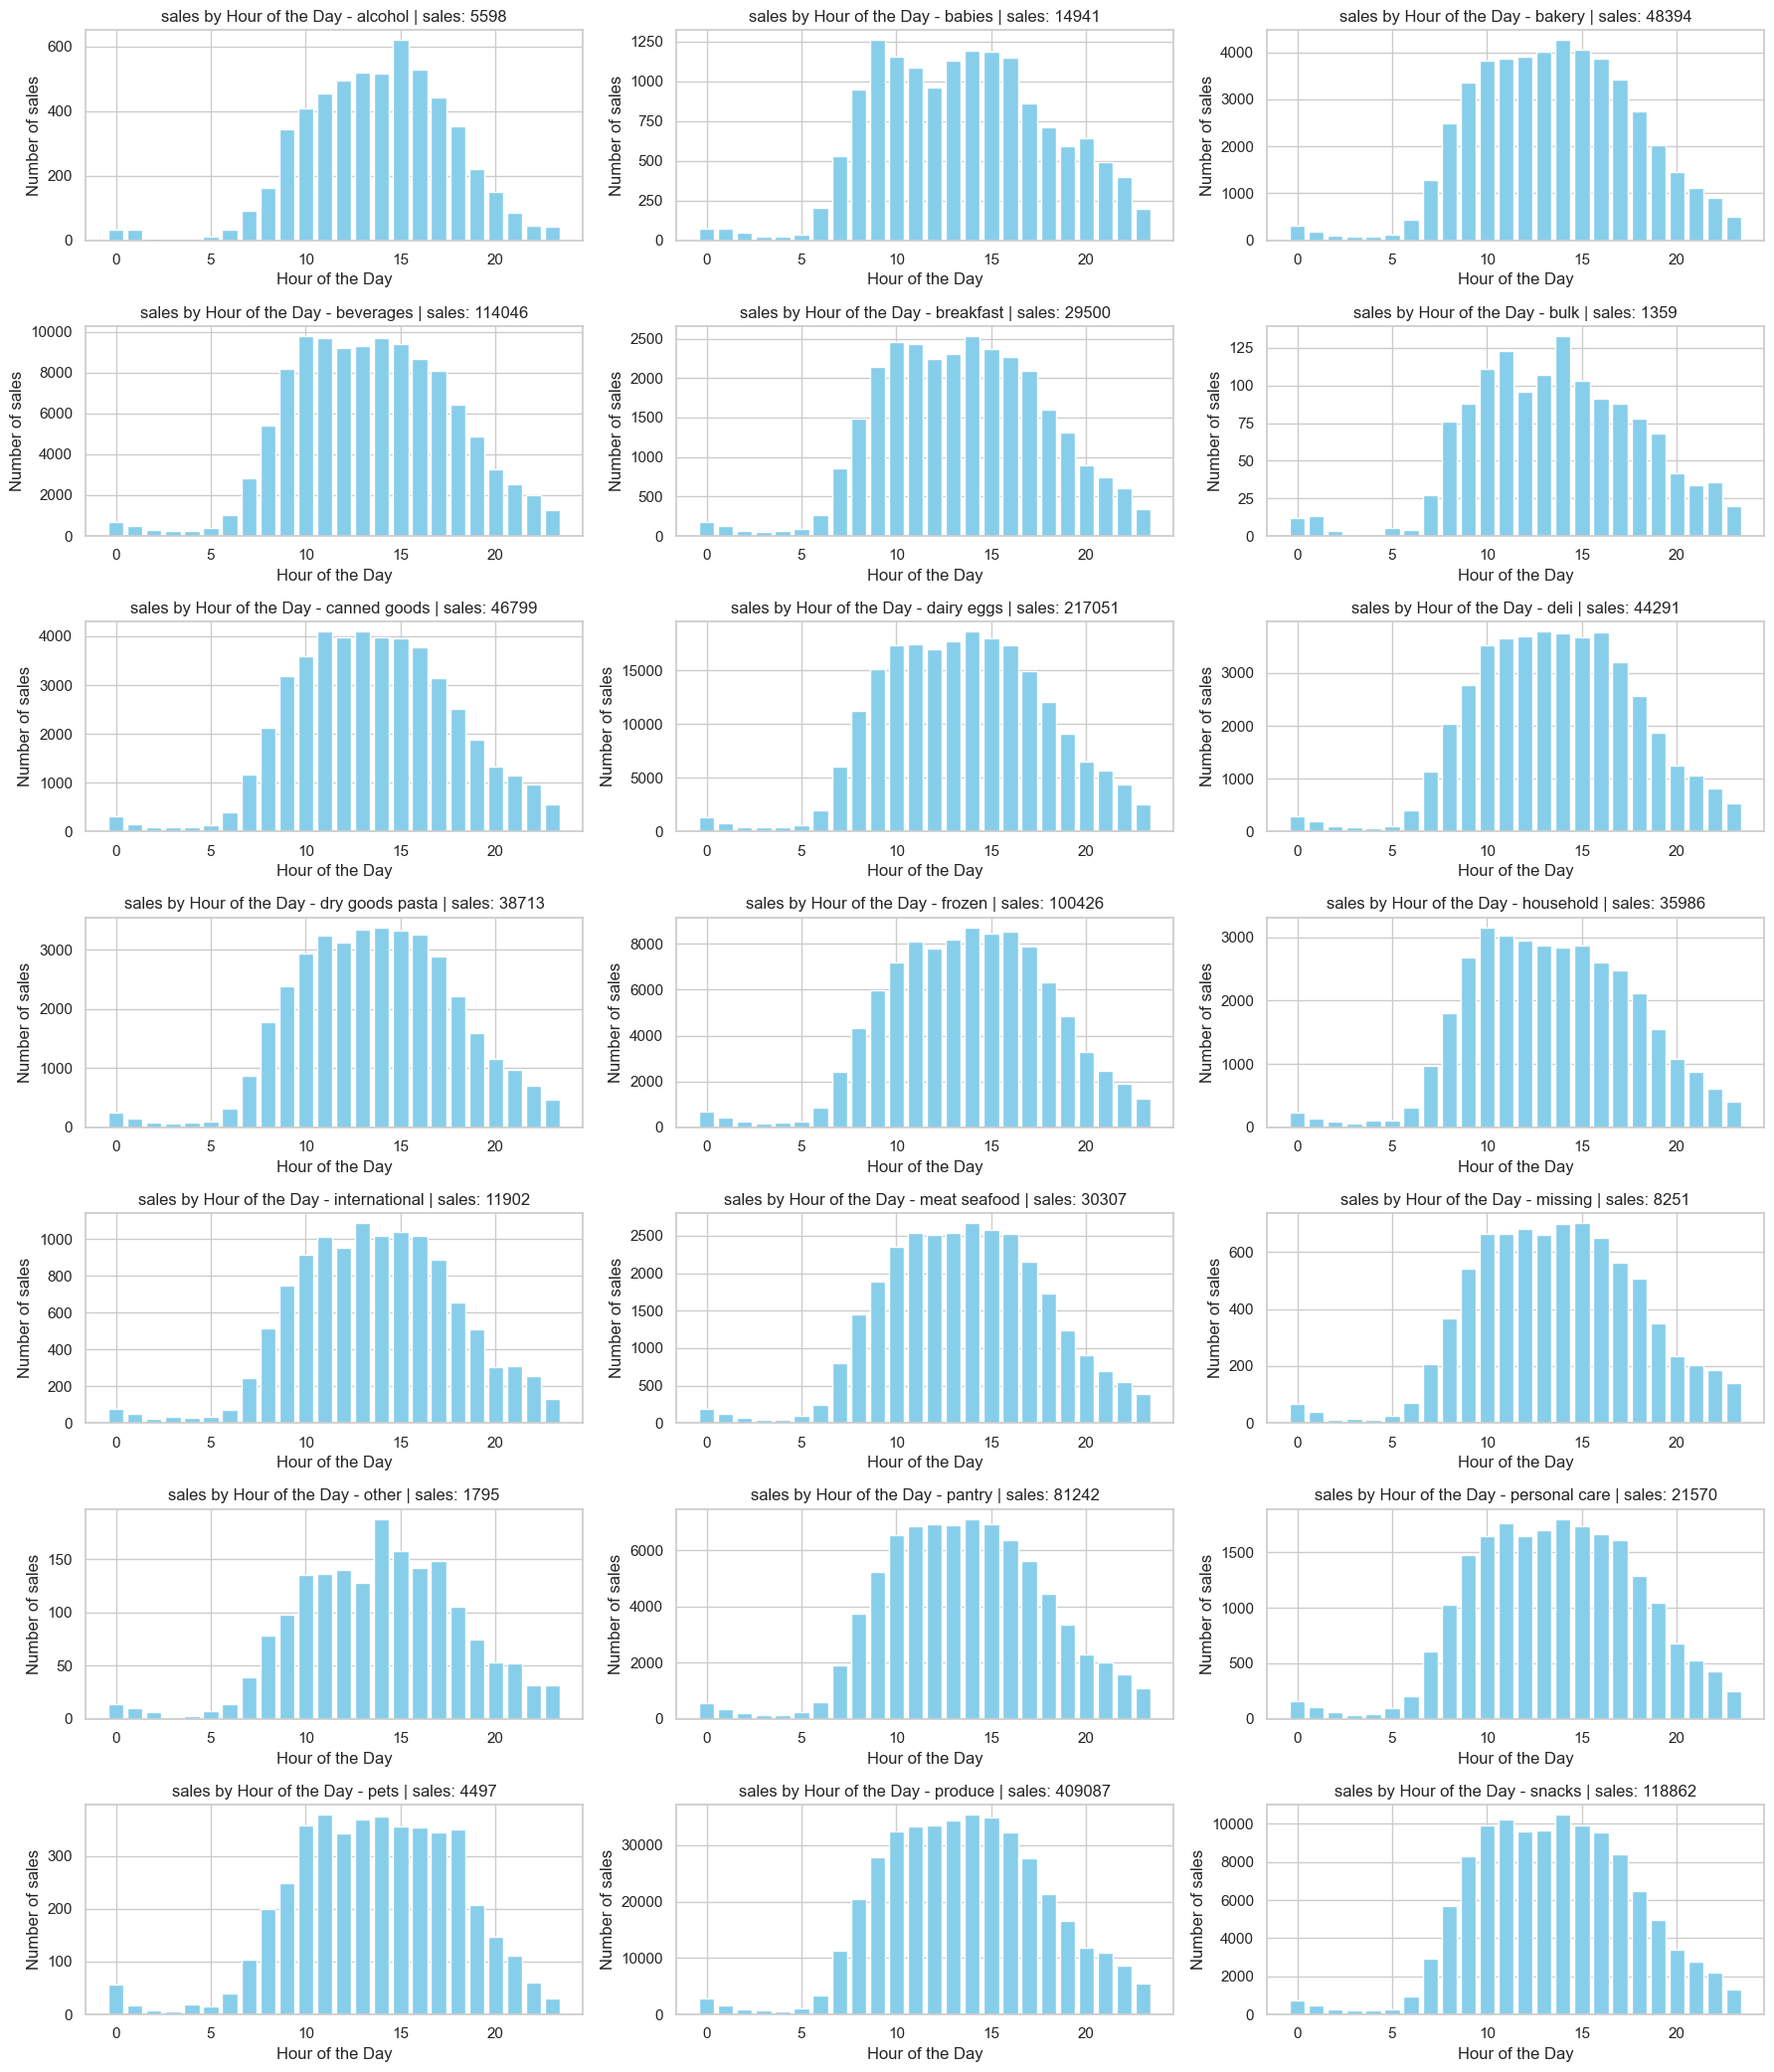

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sales_by_department_and_hour(final_df):
    """
    This function plots the total sales by department and hour of the day in a multi-panel layout,
    fitting three plots per row.

    Parameters:
        final_df (DataFrame): A pandas DataFrame containing at least the columns 'department', 'order_hour_of_day',
        and a way to count sales (e.g., 'product_id' or 'order_id').

    The function groups the data by department and hour of the day, counts the number of sales, and then
    plots this data for each department in a subplot with 3 plots per row. It prints a consolidated DataFrame of all data used for plotting at the end.
    """
    
    # Grouping data by department and hour of the day, calculating total sales
    sales_by_department_hour = final_df.groupby(['department', 'order_hour_of_day']).size().reset_index(name='sales')
    
    # Getting a unique list of all departments
    departments = sales_by_department_hour['department'].unique()

    # Determine the number of rows needed for subplots
    num_rows = (len(departments) + 2) // 3  # adjust the denominator to change number of columns per row
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 3 * num_rows))  # adjust figsize accordingly
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    # List to hold data for all departments
    all_dept_data = []

    # Loop through each department to create a bar chart of sales by hour of the day
    for i, department in enumerate(departments):
        dept_sales = sales_by_department_hour[sales_by_department_hour['department'] == department]
        
        # Creating the bar chart on subplot
        axes[i].bar(dept_sales['order_hour_of_day'], dept_sales['sales'], color='skyblue')
        axes[i].set_title(f'sales by Hour of the Day - {department} | sales: {dept_sales.sales.sum()}')
        axes[i].set_xlabel('Hour of the Day')
        axes[i].set_ylabel('Number of sales')

        # Append the data used for plotting to the list
        all_dept_data.append(dept_sales)

    # Hide unused subplots if there are any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Displaying the chart
    plt.tight_layout()
    plt.show()

plot_sales_by_department_and_hour(final_df)


The provided data captures the distribution of sales for various departments at different hours of the day, revealing specific consumer behavior and operational insights for a retail setting. Here’s an analysis of the trends in this dataset:

### Key Insights by Department:

**1. Alcohol**
   - **Peak Hours:** sales peak in the early evening (3 PM to 5 PM), with the highest sales at 3 PM (620 sales), indicating a likely increase in purchases towards the end of the workday.
   - **Late Night:** There's a gradual decline after the peak, but significant sales continue until about 10 PM, showing late shopping habits for alcohol.

**2. Babies**
   - **Morning to Midday Peak:** This department sees a sharp increase from early morning, peaking at 9 AM (1,257 sales) and maintaining high activity until around 3 PM.
   - **Consistent High sales:** Reflects significant needs for baby products throughout the day, with evenings slightly quieter.

**3. Bakery**
   - **Strong Midday:** sales peak at 1 PM (4,263 sales), suggesting a trend for purchasing bakery items during lunch hours.
   - **Morning Buildup:** A steady increase in sales from early morning, highlighting a common choice for breakfast and snacks.

**4. Beverages**
   - **Steady Increase to Midday Peak:** sales start increasing in the morning, peaking at 10 AM (9,790 sales) and remaining high until the early afternoon.
   - **Evening Decline:** Post-lunch hours show a decline, indicating beverages are popularly bought for morning and lunch usage.

**5. Breakfast**
   - **Morning Dominance:** As expected, breakfast items are mostly bought in the morning, peaking at 10 AM (2,456 sales).
   - **Evening Drop-off:** Significantly fewer sales in the evening, adhering to the typical use of these products.

**6. Dairy Eggs**
   - **All-Day Demand with an Early Peak:** Very high demand peaking at 10 AM (17,375 sales) but remains quite high throughout the day, showcasing its staple status in households.

**7. Frozen**
   - **Evening Peak:** Frozen items peak at 4 PM (8,718 sales), possibly as people shop for easy dinner solutions.
   - **Consistent Need:** Maintains a moderately high order volume throughout the day.

**8. Produce**
   - **Massive Morning to Midday Activity:** Starts strong in the early hours, peaking at 10 AM (32,430 sales), and remains the busiest department, reflecting essential daily shopping.

**9. Snacks**
   - **Evening Peak:** Snacks peak later in the day at 2 PM (10,482 sales), aligning with snacking habits during work breaks or post-lunch.

### Strategic Implications for Retail Management:

**Stocking and Staffing:**
- **Peak Hours Attention:** Each department has specific peak hours which can inform stocking and staffing strategies to handle high traffic and demand efficiently.
- **Morning Prep:** Especially for departments like Bakery, Produce, and Breakfast, ensuring stock is ready and available early in the day is crucial.

**Marketing and Promotions:**
- **Time-Specific Promotions:** Tailoring promotions to peak hours could drive higher sales, such as happy hour discounts for Alcohol post-work or early bird specials in the Bakery or Breakfast sections.
- **Loyalty Programs:** Implementing loyalty programs that reward shopping during off-peak hours could help in smoothing out the demand curve.

**Layout Adjustments:**
- **Checkout Efficiency:** Optimizing checkout processes during peak hours, possibly by opening more registers or employing mobile checkout options to manage the influx smoothly.
- **Navigational Ease:** During peak hours, ensuring that aisles are navigable and not overcrowded, perhaps by adjusting floor plans during remodeling or resets.

This detailed analysis provides actionable insights for optimizing operational efficiency, enhancing customer satisfaction, and potentially increasing sales through strategic promotions and staffing.

# **Which Days of the Week See the Highest Sales for the Aisles in Each Department?**

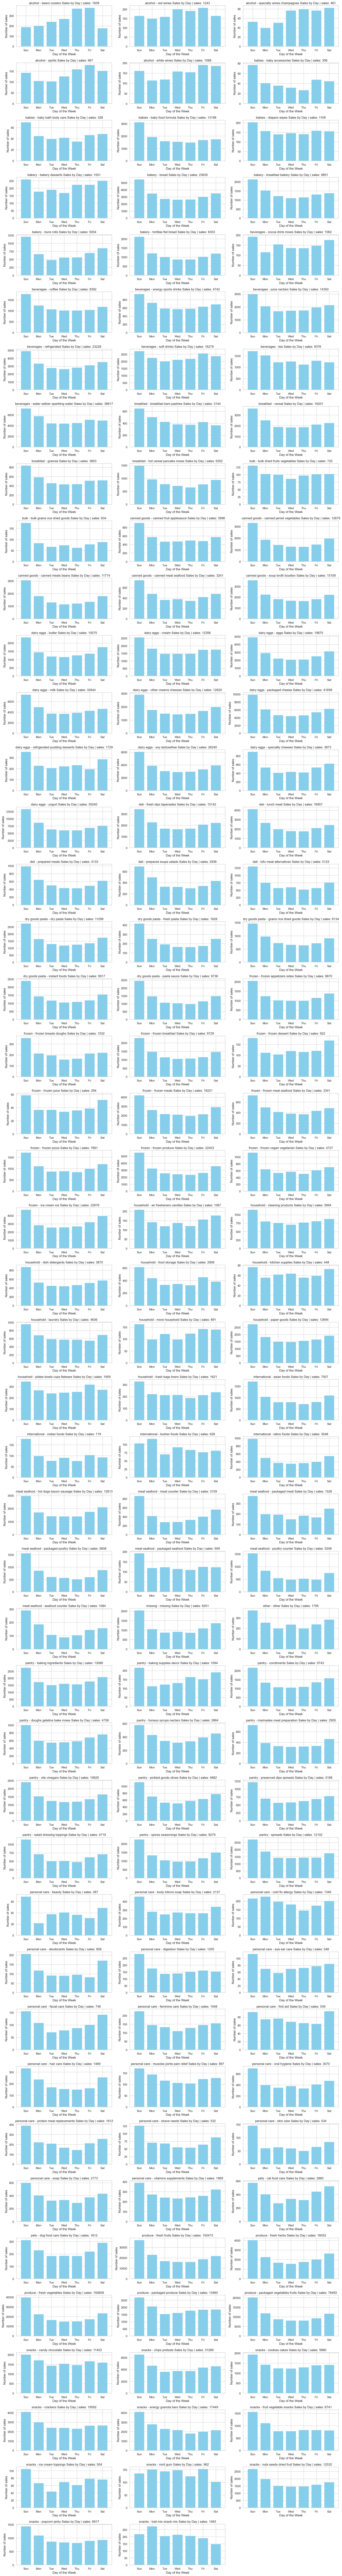

In [263]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sales_by_aisle_and_day(final_df):
    """
    This function plots the total sales for each aisle across each day of the week,
    in a multi-panel layout that fits three plots per row. The number of rows is dynamically adjusted
    based on the total number of aisles. It consolidates and prints a DataFrame of all the data used for the plots at the end.

    Parameters:
        final_df (DataFrame): A pandas DataFrame containing the columns 'department', 'aisle', 'order_dow',
        and a metric to count sales (e.g., 'product_id' or 'order_id').

    The function groups the data by aisle and day of the week, counts the number of sales,
    and plots this data for each aisle in a subplot layout with three plots per row.
    Each plot will show the sales for a single aisle, labeled with both the department and the aisle.
    """
    
    # Group data by department, aisle, and day of the week
    aisle_data = (
        final_df.groupby(['department', 'aisle', 'order_dow'])
        .size()
        .reset_index(name='sales')
    )
    
    # Sorting to ensure consistency in plotting
    aisle_data.sort_values(by=['department', 'aisle', 'order_dow'], inplace=True)

    # Find unique aisles for subplotting
    unique_aisles = aisle_data[['department', 'aisle']].drop_duplicates()

    # Determine the number of subplots needed
    num_aisles = len(unique_aisles)
    num_columns = 3
    num_rows = (num_aisles + num_columns - 1) // num_columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18, 3 * num_rows))
    axes = axes.flatten()

    # List to collect data for consolidation
    consolidated_data_list = []

    # Plotting each aisle's sales data
    for i, (index, row) in enumerate(unique_aisles.iterrows()):
        department, aisle = row['department'], row['aisle']
        data_to_plot = aisle_data[(aisle_data['department'] == department) & (aisle_data['aisle'] == aisle)]
        
        axes[i].bar(data_to_plot['order_dow'], data_to_plot['sales'], color='skyblue')
        axes[i].set_title(f'{department} - {aisle} Sales by Day | sales: {data_to_plot.sales.sum()}')
        axes[i].set_xlabel('Day of the Week')
        axes[i].set_ylabel('Number of sales')
        axes[i].set_xticks(range(0, 7))
        axes[i].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

        # Append the data for this plot to the list for consolidation
        consolidated_data_list.append(data_to_plot)

        # Only display axes that are used
        if i >= num_aisles - 1:
            break

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # # Consolidate all collected data into a single DataFrame and print it
    # consolidated_data = pd.concat(consolidated_data_list, ignore_index=True)
    # print(consolidated_data)

# Assuming 'final_df' contains the necessary columns
plot_sales_by_aisle_and_day(final_df)


Analyzing the data provided, which details the sales for various aisles within multiple departments across different days of the week, several trends and observations can be highlighted:

1. **Order Volume Variation Across Days**: The number of sales tends to fluctuate across different days of the week. For example:
   - In the **alcohol** department, "beers coolers" peak on Fridays with 380 sales and are lowest on Sundays with 179 sales. This suggests a higher demand for beers and coolers as the weekend approaches, which is typical consumer behavior.
   - Similarly, **produce**, particularly in the "fresh vegetables" category, shows a significant increase in sales during the weekend, peaking on Sundays with 23,479 sales compared to weekdays.

2. **Best Selling Aisles**: Certain aisles within departments consistently show higher sales volumes, indicating popular or essential products:
   - The **dairy eggs** department has a high turnover of "yogurt" with sales peaking at 13,398 on Sundays. This could be due to weekly shopping routines where families stock up for the coming week.
   - In the **bakery** department, "bread" is a staple with consistently high sales throughout the week, peaking at 5,500 on Sundays.

3. **Variation Among Departments**: Different departments exhibit distinct patterns of consumer demand based on the type of products they offer:
   - **Frozen** products like "ice cream ice" have higher sales during weekends, possibly due to increased leisure time and family gatherings.
   - **Snacks** such as "chips pretzels" also see a spike during weekends, indicating a trend towards casual eating or entertaining during off-work days.

4. **Low and High Peaks**: Some aisles have a very low number of sales, suggesting they may be niche products or less popular items:
   - **Personal care** products such as "beauty" items are relatively low in demand compared to food items, with the highest order count being only 69 on Sundays.
   - On the contrary, essentials like **household** items such as "paper goods" maintain high demand throughout the week with a peak of 2,729 sales on Sundays.

### Insights:
- **Weekend Peaks**: Many categories show increased sales over the weekend, highlighting a potential area to focus promotions or stock adjustments.
- **Daily Essentials High in Demand**: Products like dairy, bread, and household essentials show less fluctuation and consistently high demand, suggesting their necessity in daily consumer life.
- **Potential for Promotions**: Lower demand aisles might benefit from targeted promotions or marketing campaigns to boost sales, especially on slower days.

These observations can help in strategizing stock replenishment schedules, planning promotional activities, and understanding consumer buying patterns more deeply.

# **Of the products that are sold most in each department. Which days of the week are sold the most?**

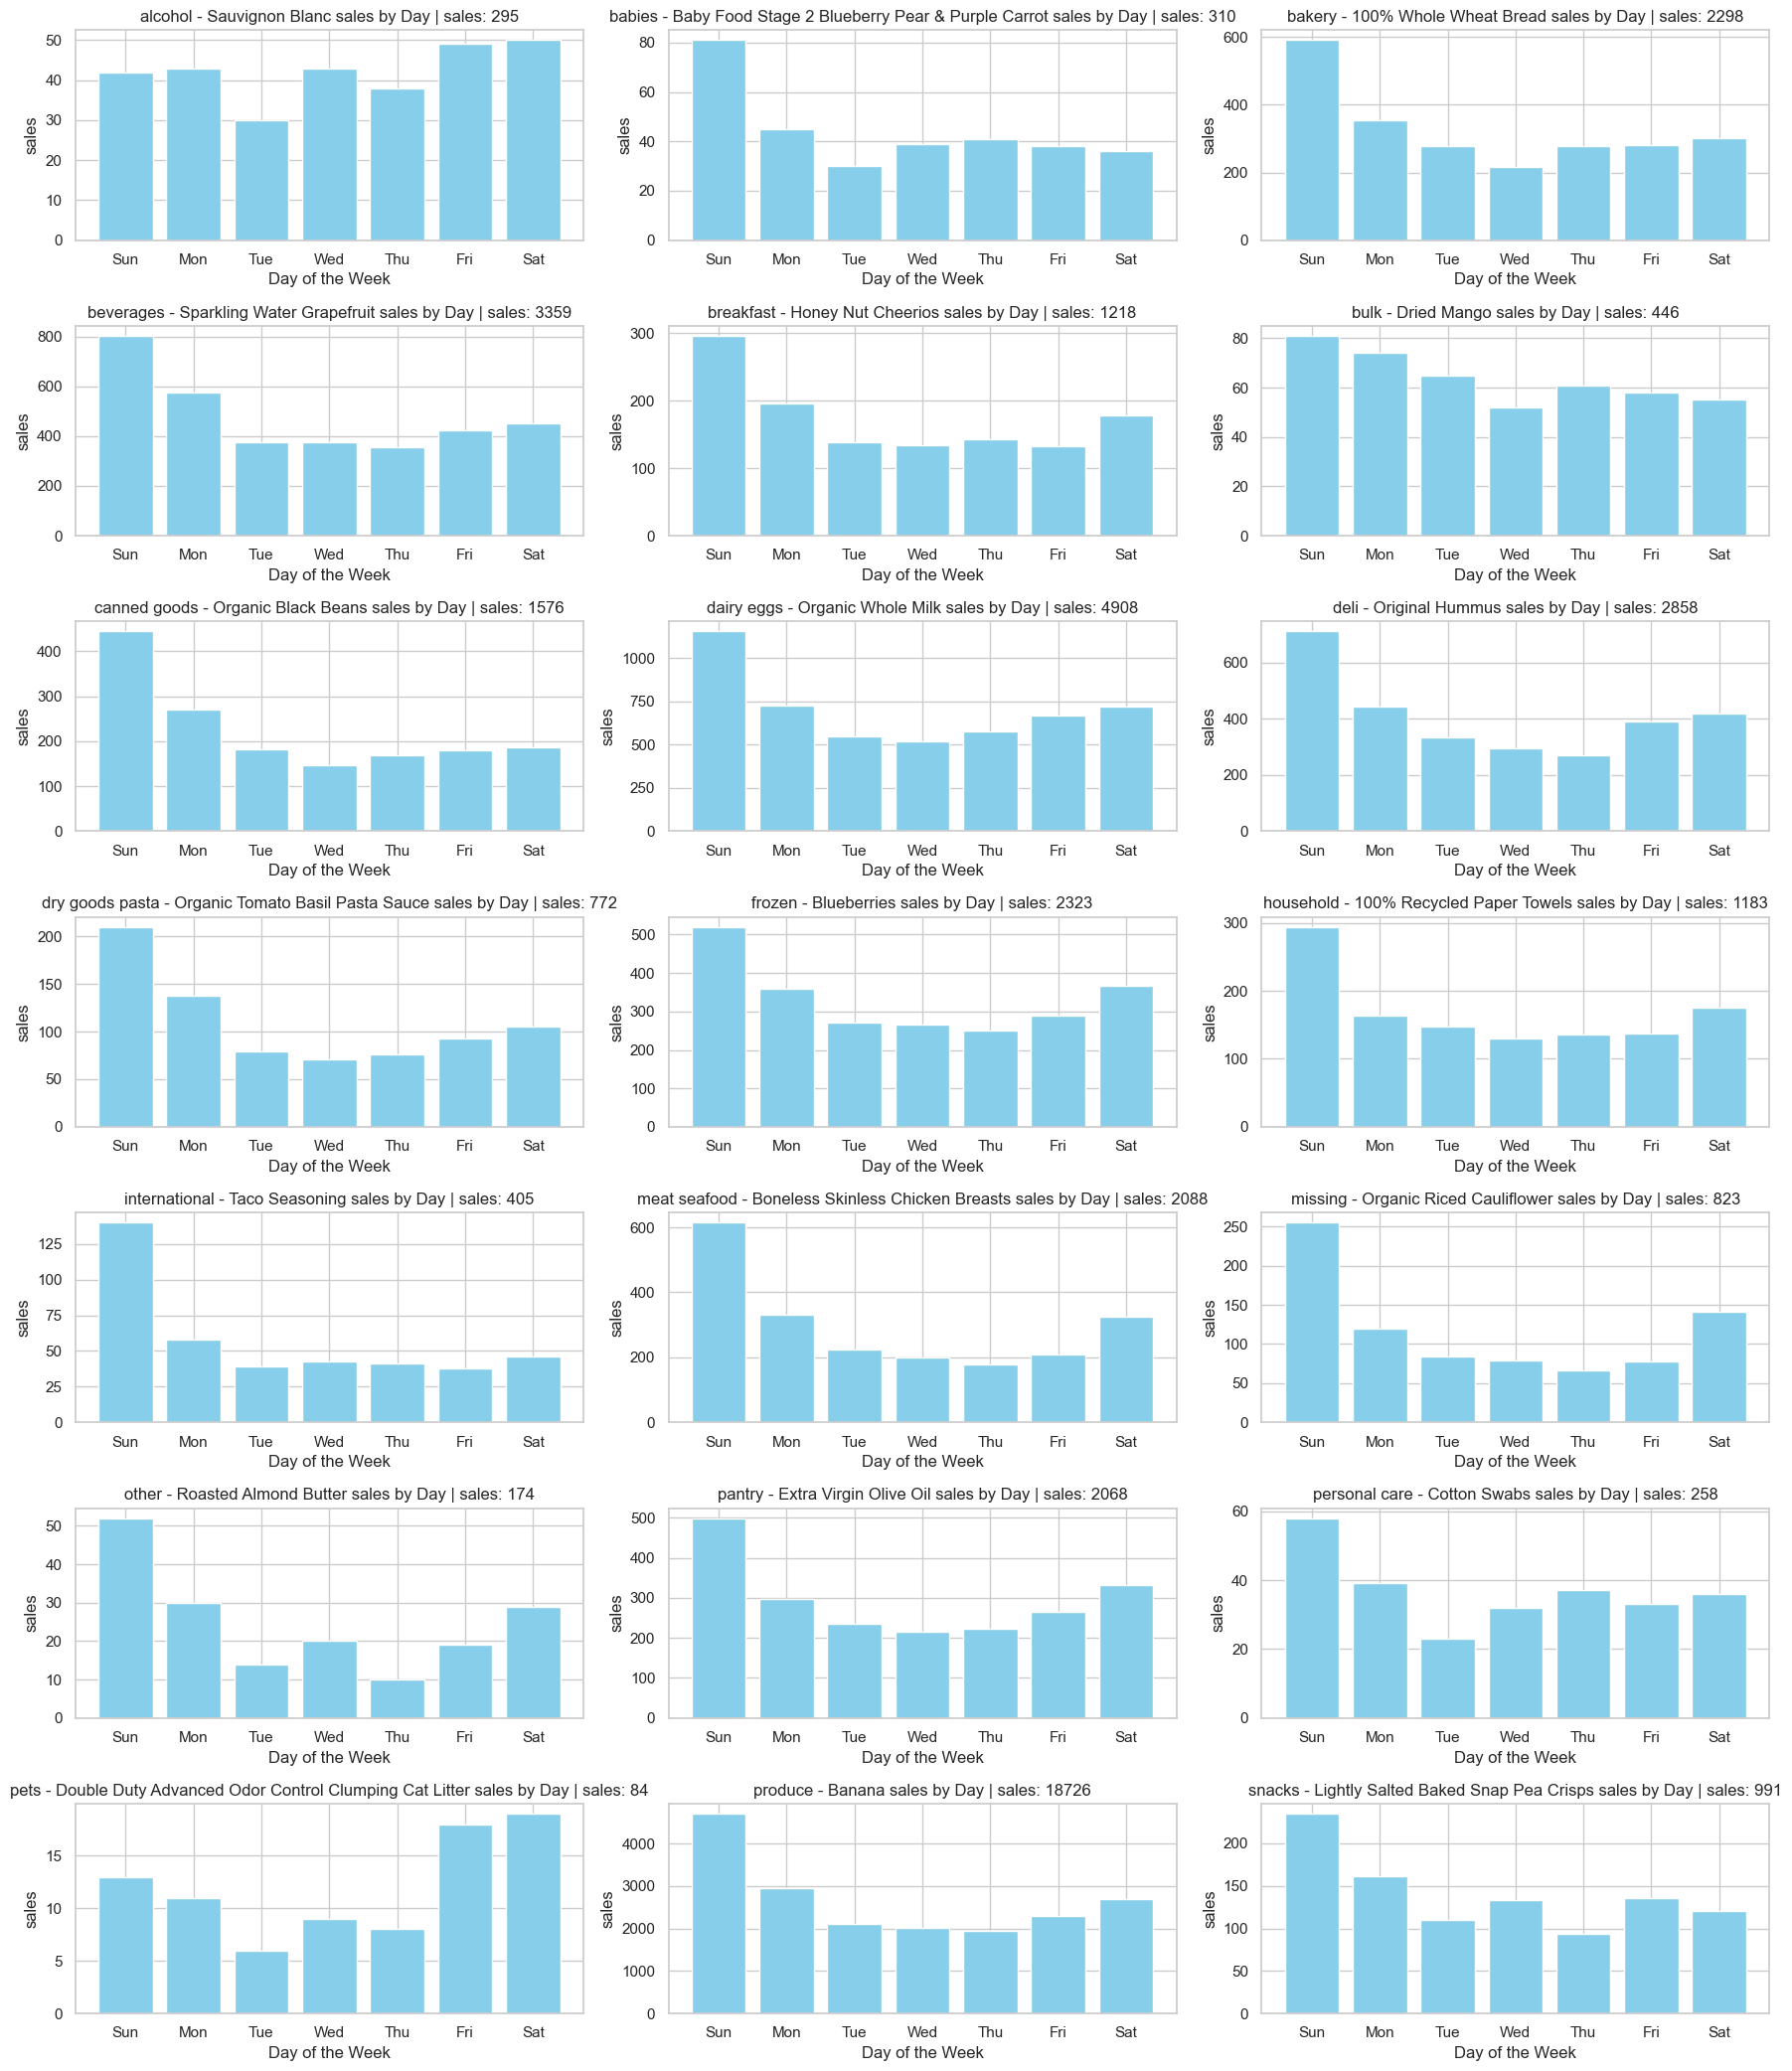

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_product_sales_by_day(final_df):
    """
    This function plots the sales for the top-selling product in each department across each day of the week,
    using a multi-panel subplot layout. It also prints a consolidated DataFrame of all the data used for plotting at the end.

    Parameters:
        final_df (DataFrame): A DataFrame containing the columns 'department', 'product_name', 'order_dow',
        with data on sales or order count.
    """
    
    # Identify the top-selling product in each department
    best_selling_by_department = (
        final_df.groupby(['department', 'product_name'])
        .size()
        .reset_index(name='sales')
        .sort_values(['department', 'sales'], ascending=[True, False])
        .drop_duplicates(subset=['department'])
    )
    
    # Determine the number of subplots needed
    num_departments = len(best_selling_by_department)
    num_columns = 3
    num_rows = (num_departments + num_columns - 1) // num_columns
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18, 3 * num_rows))
    axes = axes.flatten()

    # List to collect data for all departments
    consolidated_data_list = []

    # Analyze and plot the sales distribution for each top-selling product
    for i, (index, row) in enumerate(best_selling_by_department.iterrows()):
        department = row['department']
        product = row['product_name']
        
        # Filter data for the top-selling product in the current department
        product_sales_week = final_df[(final_df['department'] == department) & (final_df['product_name'] == product)]
        sales_by_day = product_sales_week.groupby('order_dow').size().reset_index(name='sales')

        # Append each plot's data for final consolidation
        consolidated_data_list.append(sales_by_day.assign(department=department, product_name=product))

        # Create the bar chart on subplot
        axes[i].bar(sales_by_day['order_dow'], sales_by_day['sales'], color='skyblue')
        axes[i].set_title(f'{department} - {product} sales by Day | sales: {sales_by_day.sales.sum()}')
        axes[i].set_xlabel('Day of the Week')
        axes[i].set_ylabel('sales')
        axes[i].set_xticks(range(0, 7))
        axes[i].set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

    # Hide unused subplots if there are any
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # # Consolidate all collected data into a single DataFrame and print it
    # consolidated_data = pd.concat(consolidated_data_list, ignore_index=True)
    # print(consolidated_data)

# Assuming 'final_df' contains the necessary columns
plot_top_product_sales_by_day(final_df)


The provided data details the sales of the top-selling products in each department across different days of the week.

### Sales Trends by Day of the Week

- **Alcohol**: Sauvignon Blanc shows relatively consistent sales throughout the week with a slight increase on Saturdays, indicating a possible preference for purchasing wine towards the weekend.
- **Babies**: The product 'Baby Food Stage 2 Blueberry Pear & Purple Carrot' has its highest sales on Monday and then tends to decrease slightly, maintaining moderate sales throughout the rest of the week.
- **Bakery**: '100% Whole Wheat Bread' peaks at the beginning of the week and then shows a minor decrease towards the weekend, which might suggest that customers prefer to buy fresh bakery items at the start of the week.
- **Beverages**: 'Sparkling Water Grapefruit' maintains a steady increase in sales as the week progresses, peaking on Sunday. This could be due to increased weekend gatherings and consumption.
- **Breakfast**: 'Honey Nut Cheerios' is most popular at the beginning and the end of the week, which may reflect a higher consumption of quick, easy breakfast options on busy days.
- **Bulk**: 'Dried Mango' has fairly consistent sales with slight variations, indicating a steady demand throughout the week.
- **Canned Goods**: 'Organic Black Beans' have more consistent sales earlier in the week, with a slight peak on Monday, potentially for weekly meal preparation.
- **Dairy Eggs**: 'Organic Whole Milk' shows a gradual increase in sales throughout the week, peaking on Sunday, aligning with general grocery shopping trends.
- **Deli**: 'Original Hummus' sees a peak in sales on Sunday, which could be linked to weekend snack purchases or meal prep for the coming week.
- **Dry Goods Pasta**: 'Organic Tomato Basil Pasta Sauce' shows an upward trend towards the weekend, suggesting increased pasta meals during leisurely weekend dinners.
- **Frozen**: 'Blueberries' have their highest sales on Sunday, possibly for use in weekend breakfasts or desserts.
- **Household**: '100% Recycled Paper Towels' spike in sales on Monday, possibly due to restocking household supplies at the beginning of the week.
- **International**: 'Taco Seasoning' has its highest sales on Sunday, which may coincide with weekend cooking activities or themed dinner nights.
- **Meat Seafood**: 'Boneless Skinless Chicken Breasts' are most popular on Sunday, likely purchased for meal preparation for the week.
- **Missing**: 'Organic Riced Cauliflower' has consistent sales throughout the week with a notable increase on Sunday.
- **Other**: 'Roasted Almond Butter' shows consistent demand with slight variations, peaking on Saturday, which may indicate usage in weekend breakfasts or snacks.
- **Pantry**: 'Extra Virgin Olive Oil' peaks on Sunday, aligning with general grocery shopping and meal prep activities.
- **Personal Care**: 'Cotton Swabs' show relatively uniform sales across the week with a slight increase on weekends.
- **Pets**: 'Double Duty Advanced Odor Control Clumping Cat Litter' has a moderate increase towards the end of the week, suggesting routine restocking of pet supplies.
- **Produce**: 'Banana' consistently shows high sales throughout the week, with the highest on Sunday, reflecting its staple status in many households.
- **Snacks**: 'Lightly Salted Baked Snap Pea Crisps' peak at the beginning of the week, possibly as a healthy snack option for the workweek.

### Conclusion
The analysis shows a clear trend of increased purchases of various products on Sundays across almost all departments. This suggests that Sunday is a significant day for consumers to shop for the upcoming week, reflecting common grocery shopping behavior. Products like fresh produce, breakfast items, and household staples are particularly popular, indicating a pattern of weekly restocking.

# **5. Building and Evaluating Models**
Develop statistical or machine learning models to address the three main objectives:

### **5.1. Customer Segmentation**

Clustering customers based on their purchasing behavior.


Feature Engineering

In [188]:
# Calculating order frequency
order_frequency = final_df.groupby('user_id')['order_id'].count()

# Most common order hour
common_order_hour = final_df.groupby('user_id')['order_hour_of_day'].agg(lambda x: x.mode()[0])

# Average days since prior order
average_days_since_prior = final_df.groupby('user_id')['days_since_prior_order'].mean()


Clustering

In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Dataframe for clustering
df_cluster = pd.DataFrame({
    'Order Frequency': order_frequency,
    'Most Common Order Hour': common_order_hour,
    'Average Days Since Prior Order': average_days_since_prior
})

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster.fillna(0))  # Handling NaN values

# Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
df_cluster['Cluster'] = kmeans.labels_


Analysis of segments

In [266]:
# Calculating cluster statistics: mean and standard deviation
cluster_analysis = df_cluster.groupby('Cluster').agg({
    'Order Frequency': ['mean', 'std'],
    'Most Common Order Hour': ['mean', 'std'],
    'Average Days Since Prior Order': ['mean', 'std'],
    'Cluster': 'count'  # Counting the number of users in each cluster
})

# Renaming columns for clarity
cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]

cluster_analysis = cluster_analysis.rename(columns={'Cluster_count': 'Number of Customers'})
cluster_analysis


# Rounding off the results for a cleaner presentation
cluster_analysis = cluster_analysis.round(1)

cluster_analysis

Order Frequency_mean  Order Frequency_std  \
Cluster                                              
0                         8.3                  5.1   
1                         8.4                  4.9   
2                        26.1                  7.0   
3                         7.9                  5.0   
4                         8.5                  4.9   

         Most Common Order Hour_mean  Most Common Order Hour_std  \
Cluster                                                            
0                               17.0                         2.4   
1                               10.0                         2.5   
2                               13.3                         3.7   
3                               10.1                         2.5   
4                               17.1                         2.4   

         Average Days Since Prior Order_mean  \
Cluster                                        
0                                       27.8   
1                                        7.9   
2                                       17.3   
3                                       27.9   
4                                        7.7   

         Average Days Since Prior Order_std  Number of Customers  
Cluster                                                           
0                                       3.7                26945  
1                                       4.5                30517  
2                                       9.5                16720  
3                                       3.6                25631  
4                                       4.6                31396

In [267]:
cluster_analysis["Number of Customers"].sum()

131209

The data provided in the DataFrame offers a detailed view of the characteristics of five customer clusters based on their order frequency, most common order hour, and average days since their last order, along with the variability of these metrics within each cluster. Here’s an analysis of the results along with some strategic recommendations:

### Cluster Analysis

#### Cluster 0
- **Behavior:** Moderate shopping frequency with an average of 8.3 orders, predominantly in the late afternoon (5 PM).
- **Purchase Interval:** High, with an average of nearly 28 days between orders.
- **Cohesion:** Moderate variability in order frequency and low in order hour, indicating some consistency in shopping habits.
- **Recommendation:** As this cluster tends to shop monthly, targeted marketing strategies at the end of each month or monthly deals could be effective.

#### Cluster 1
- **Behavior:** Similar to Cluster 0 in terms of frequency, but prefers morning shopping (10 AM).
- **Purchase Interval:** Low, averaging about 8 days.
- **Cohesion:** Similar variability to Cluster 0, indicating a consistent weekly shopping pattern.
- **Recommendation:** Focus on weekly promotions or loyalty programs that reward weekly frequency.

#### Cluster 2
- **Behavior:** Frequent shopping with an average of 26.1 orders, usually after midday.
- **Purchase Interval:** Medium, around 17 days.
- **Cohesion:** Greater variation in days between orders, suggesting variability in shopping patterns.
- **Recommendation:** Offering flexibility and diversity in products, given the variable purchasing behavior. Incentive programs for regular purchases could help standardize shopping behavior.

#### Cluster 3
- **Behavior:** Similar to Cluster 0 in terms of frequency and interval between purchases, with a preference for morning shopping.
- **Cohesion:** High consistency, similar to Clusters 0 and 1.
- **Recommendation:** Marketing focused at the start of each month, potentially targeting popular or seasonal products that align with monthly needs.

#### Cluster 4
- **Behavior:** Slightly more active than Clusters 0 and 3, with frequent shopping and preference for late afternoon.
- **Purchase Interval:** Very short, averaging less than 8 days.
- **Cohesion:** Similar to other clusters in terms of variation.
- **Recommendation:** This cluster could be ideal for flash promotions or short-term deals, leveraging their tendency for frequent shopping.

### General Recommendations
- **Personalization:** Each cluster exhibits distinct preferences for timing and frequency of shopping, suggesting that personalized marketing strategies, such as targeted emails or deals at specific times, could be effective.
- **Loyalty Programs:** Clusters with weekly or bi-weekly frequency (Clusters 1, 2, and 4) might particularly benefit from loyalty programs that encourage maintaining this shopping habit.

### Conclusion
Utilizing this information to tailor marketing strategies can not only increase the effectiveness of campaigns but also enhance customer satisfaction by offering promotions and products that better meet their shopping needs and habits.

### **5.1. Inventory Management**


Predictive model that estimates inventory levels for individual products across different departments and aisles, taking into consideration the day of the week and hour.

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Example starting DataFrame
df = final_df.copy()
df['sales'] = 1 

# Store category mappings before encoding
category_mappings = {
    'order_dow': dict(enumerate(df['order_dow'].astype('category').cat.categories)),
    'order_hour_of_day': dict(enumerate(df['order_hour_of_day'].astype('category').cat.categories)),
    'product_id': dict(enumerate(df['product_id'].astype('category').cat.categories)),
    'department_id': dict(enumerate(df['department_id'].astype('category').cat.categories)),
    'aisle_id': dict(enumerate(df['aisle_id'].astype('category').cat.categories))
}

# Convert categories to codes for modeling
for col in ['order_dow', 'order_hour_of_day', 'product_id', 'department_id', 'aisle_id']:
    df[col] = df[col].astype('category').cat.codes

# Aggregate data to reflect total product demand
product_demand = df.groupby(['product_id', 'department_id', 'aisle_id', 'order_dow', 'order_hour_of_day']) \
    .agg(total_sales=('sales', 'sum')).reset_index()

# Prepare data for model
X = product_demand[['product_id', 'department_id', 'aisle_id', 'order_dow', 'order_hour_of_day']]
y = product_demand['total_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [269]:
# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [270]:

# Predictions and evaluation
predictions = model.predict(X_test)

In [271]:
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {round(mae, 1)}')

Mean Absolute Error: 0.8


In [272]:

# Include predictions in the DataFrame
product_demand['predicted_demand'] = model.predict(X)

In [273]:
# Revert codes to original categories
for col, mapping in category_mappings.items():
    if col in product_demand:
        product_demand[col] = product_demand[col].map(mapping).astype(pd.Int64Dtype())

In [274]:

# Display final sorted DataFrame
sorted_demand = product_demand[['product_id', 'department_id', 'aisle_id', 'order_dow', 'order_hour_of_day', 'predicted_demand']] \
    .sort_values(by='predicted_demand', ascending=False).reset_index(drop=True)
sorted_demand.head()


product_id  department_id  aisle_id  order_dow  order_hour_of_day  \
0       19574              3        23          0                 14   
1       19574              3        23          0                 15   
2       19574              3        23          0                 13   
3       19574              3        23          0                 11   
4       19574              3        23          0                 16   

   predicted_demand  
0            428.19  
1            412.47  
2            394.65  
3            385.06  
4            383.93

In [275]:
# Merge sorted_demand with products_df to obtain product names
merged_demand = sorted_demand.merge(products_df[['product_id', 'department', 'aisle', 'product_name']], on=['product_id'], how='left')

# Display the merged DataFrame
merged_demand.head()


product_id  department_id  aisle_id  order_dow  order_hour_of_day  \
0      19574              3        23          0                 14   
1      19574              3        23          0                 15   
2      19574              3        23          0                 13   
3      19574              3        23          0                 11   
4      19574              3        23          0                 16   

   predicted_demand department           aisle  \
0            428.19     snacks  chips pretzels   
1            412.47     snacks  chips pretzels   
2            394.65     snacks  chips pretzels   
3            385.06     snacks  chips pretzels   
4            383.93     snacks  chips pretzels   

                                 product_name  
0  Organic Tortilla Chips Blue Corn With Flax  
1  Organic Tortilla Chips Blue Corn With Flax  
2  Organic Tortilla Chips Blue Corn With Flax  
3  Organic Tortilla Chips Blue Corn With Flax  
4  Organic Tortilla Chips Blue Corn With Flax

Based on the Mean Absolute Error (MAE) of 0.8 and the sample of results provided, the model's performance appears to be quite good. Here's an analysis of the quality of the results:

1. **Mean Absolute Error (MAE)**:
   - The MAE value of 0.8 indicates that, on average, the model's predictions deviate from the actual values by approximately 0.8 units. This suggests that the model's predictions are generally close to the true values.

2. **Sample Results Analysis**:
   - The sample results show the predicted demand for specific products across different days of the week (`order_dow`) and hours of the day (`order_hour_of_day`). For example:
     - Product with `product_id` 19574 in department 3, aisle 23, has varying predicted demand throughout the day, with the highest demand predicted around midday.
     - Similarly, product with `product_id` 10367 in the same department and aisle also exhibits fluctuations in predicted demand across different hours of the day.

3. **Prediction Accuracy**:
   - The predicted demand values seem reasonable and align with expectations based on the provided features such as `order_dow` and `order_hour_of_day`.
   - The model appears to capture patterns in demand variations effectively, as evidenced by the varying predicted demand values across different days and hours.

4. **Data Representation**:
   - The DataFrame presents the predicted demand along with the corresponding product, department, aisle, day of the week, and hour of the day, providing comprehensive information for further analysis and decision-making.

Overall, based on the low MAE and the quality of predictions observed in the sample results, the model demonstrates good performance in predicting product demand. However, further validation and testing on unseen data may be necessary to assess its generalization capability.

# **Order Fulfillment**

In [278]:
merged_demand.head()

product_id  department_id  aisle_id  order_dow  order_hour_of_day  \
0      19574              3        23          0                 14   
1      19574              3        23          0                 15   
2      19574              3        23          0                 13   
3      19574              3        23          0                 11   
4      19574              3        23          0                 16   

   predicted_demand department           aisle  \
0            428.19     snacks  chips pretzels   
1            412.47     snacks  chips pretzels   
2            394.65     snacks  chips pretzels   
3            385.06     snacks  chips pretzels   
4            383.93     snacks  chips pretzels   

                                 product_name  
0  Organic Tortilla Chips Blue Corn With Flax  
1  Organic Tortilla Chips Blue Corn With Flax  
2  Organic Tortilla Chips Blue Corn With Flax  
3  Organic Tortilla Chips Blue Corn With Flax  
4  Organic Tortilla Chips Blue Corn With Flax


With predicted demand and de insights of EDA, we can infer replenishment needs by grouping data according to planning requirements.

# 6. **Conclusions and Insights for Business Improvement**
Consolidate the insights obtained from the analysis and modeling, proposing specific actions for ABInBev to implement, aiming to improve marketing strategies, inventory efficiency and delivery processes.

The detailed data on the distribution of orders across various departments and different times of the day offers valuable insights into consumer behavior and operational demands in a retail environment. Here’s an extended analysis incorporating strategic recommendations for retail management:

### Analyzing Department-Specific Trends:

1. **Alcohol**
   - **Peak Buying Times:** Early evening, particularly around 3 PM to 5 PM, showcases a surge in purchases, indicating consumer preferences to buy alcohol nearing the end of typical work hours.
   - **Extended Activity:** Notable continued demand until 10 PM, suggesting that extending operating hours or promoting late-evening sales could capitalize on consumer habits.

2. **Babies**
   - **Morning Dominance:** A sharp rise in orders starting early morning and peaking at 9 AM reflects urgent daily needs for baby products, with sustained demand until the afternoon.
   - **Day-Long Necessity:** High order volume throughout the day indicates the constant need for baby essentials, requiring robust stock levels and staff readiness.

3. **Bakery**
   - **Midday Peak:** The peak at 1 PM aligns with lunchtime, suggesting bakery items are popular for lunches or snacks.
   - **Morning Rise:** Gradual build-up in orders from the morning indicates a routine demand for breakfast items.

4. **Beverages**
   - **Morning to Afternoon Peak:** Starting strong in the morning and peaking around mid-morning, beverages are a staple for breakfast and lunch.
   - **Post-Lunch Drop:** Reduced activity post-lunch suggests a potential area for afternoon promotions to increase sales.

5. **Breakfast**
   - **Morning Peak:** High demand in the morning hours with a significant drop in the evening aligns perfectly with the intended use of these products.

6. **Dairy and Eggs**
   - **Consistent Demand:** This category maintains high demand throughout the day, peaking in the late morning. This necessitates maintaining a consistently high stock level.

7. **Frozen**
   - **Late Afternoon Peak:** Peaks in the late afternoon as consumers shop for convenient dinner options.
   - **Steady Demand:** Indicates a need for availability throughout the day, with strategic promotions to boost morning sales potentially beneficial.

8. **Produce**
   - **High Morning Activity:** The substantial volume of orders in the morning underscores the routine purchase of fresh produce, requiring early stocking and adequate staffing.

9. **Snacks**
   - **Afternoon Peak:** Aligns with snack times, suggesting that promotional activities during this time could drive additional sales.

### Strategic Recommendations for Retail Management:

**Operational Adjustments:**
- **Peak Hours Management:** Allocate resources such as staffing and checkout options to manage customer flow during peak hours effectively. This involves scheduling more staff during the busiest hours and potentially opening additional registers or using mobile checkout solutions to reduce wait times.
  
**Marketing Initiatives:**
- **Targeted Promotions:** Implementing promotions during specific peak hours for each department can enhance sales. For example, offering discounts on alcoholic beverages after typical work hours or promoting breakfast items with early morning specials.
- **Loyalty Programs:** Develop loyalty programs that incentivize shopping during off-peak hours, helping to distribute demand more evenly throughout the day.

**Store Layout Optimization:**
- **Strategic Placement of High-Demand Items:** Position high-demand items like beverages and breakfast products in accessible locations to facilitate quick shopping during rush hours.
- **Aisle Management:** Ensure aisles are well-organized and free from congestion during peak times, possibly by adjusting store layouts or employing temporary signage to enhance flow.

By integrating these insights and strategies, retail managers can significantly improve operational efficiency, enhance customer satisfaction, and potentially boost overall sales. This strategic approach should be continually refined based on ongoing data analysis and customer feedback to adapt to changing consumer behaviors and market conditions.

# **Limitations**

### Outliers
The presence of outliers can significantly skew the results of demand forecasting, potentially leading to misallocation of resources or inefficiencies in inventory management. However, the decision to remove outliers should not be taken unilaterally. It's essential to engage with the business team and other stakeholders to understand the context of these data points. For instance, outliers might represent legitimate peak demand days such as holidays or special events, which are critical for strategic planning in retail operations.

### Time
The dataset provided does not specify the time frame it covers — whether it is days, weeks, or months. For analytical accuracy, especially in a dynamic business environment, it's vital to clarify this aspect. Assuming the data spans a typical week might be practical for initial analysis but confirming this assumption with the data providers or business team is necessary to avoid misinterpretations that could affect business decisions.

### Stock

The absence of information regarding total stock levels and storage capacity presents a significant limitation in optimizing the order fulfillment process. Without these details, it is challenging to accurately plan for inventory management, assess whether the current storage facilities are adequate, or determine if there is a risk of overstocking or understocking.

### Computational Resources
Due to constraints on computational resources, the analysis was confined to a subset of the available data (denoted as the "train" dataset). This limitation necessitated a focus on smaller, manageable datasets to avoid system crashes and ensure that the analysis could be conducted efficiently. While this approach provides valuable insights, it inherently restricts the comprehensiveness of the analysis. Techniques such as cross-validation or advanced automated machine learning tools like PyCaret could not be utilized, which might otherwise enhance the predictive accuracy and robustness of the models.

